# 📦 About the Dataset

This dataset is designed for **predicting food delivery times** based on various influencing factors such as **distance, weather, traffic conditions**, and **time of day**. It offers a practical and engaging challenge for **machine learning practitioners**, especially those interested in **logistics** and **operations research**.

🔗 **Dataset Link**: [Food Delivery Time Prediction on Kaggle](https://www.kaggle.com/datasets/denkuznetz/food-delivery-time-prediction)

---

## 🧾 Key Features

- **Order_ID**: Unique identifier for each order.

- **Distance_km**: The delivery distance in kilometers.

- **Weather**: Weather conditions during the delivery  
  *(e.g., Clear, Rainy, Snowy, Foggy, Windy)*

- **Traffic_Level**: Traffic conditions categorized as  
  *Low*, *Medium*, or *High*

- **Time_of_Day**: The time when the delivery took place, categorized as  
  *Morning*, *Afternoon*, *Evening*, or *Night*

- **Vehicle_Type**: Type of vehicle used for delivery  
  *(e.g., Bike, Scooter, Car)*

- **Preparation_Time_min**: Time required to prepare the order, measured in minutes.

- **Courier_Experience_yrs**: Experience of the courier in years.

- **Delivery_Time_min**: 📌 **Target variable** — The total delivery time in minutes.


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

## Import the CSV Data as Pandas DataFrame

In [2]:
data = pd.read_csv('Food_Delivery_Times.csv')
data.head(5)

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [3]:
#### Shape of the dataset
data.shape

(1000, 9)

In [4]:
#### columns in the dataset
data.columns

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

## Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [5]:
##check missing values
data.isna().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [6]:
##check for duplicates
data.duplicated().sum()

0

In [7]:
# Check Null and Dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [8]:
###check the unique values for each column
data.select_dtypes(include=['object']).columns

Index(['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type'], dtype='object')

In [9]:
cat_column = data.select_dtypes(include=['object']).columns

data[cat_column].nunique()

Weather          5
Traffic_Level    3
Time_of_Day      4
Vehicle_Type     3
dtype: int64

In [10]:
###check statistics of the dataset for numerical values
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Order_ID,1000.0,500.500000,288.819436,1.00,250.750,500.50,750.2500,1000.00
Distance_km,1000.0,10.059970,5.696656,0.59,5.105,10.19,15.0175,19.99
Preparation_Time_min,1000.0,16.982000,7.204553,5.00,11.000,17.00,23.0000,29.00
Courier_Experience_yrs,970.0,4.579381,2.914394,0.00,2.000,5.00,7.0000,9.00
Delivery_Time_min,1000.0,56.732000,22.070915,8.00,41.000,55.50,71.0000,153.00


### Exploring Data

In [11]:
# define numerical & categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['Order_ID', 'Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']

We have 4 categorical features : ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']


In [12]:
print("Categories in 'employment' variable:     ",end=" " )
print(data['Weather'].unique())

Categories in 'employment' variable:      ['Windy' 'Clear' 'Foggy' 'Rainy' 'Snowy' nan]


In [13]:
print("Categories in 'Traffic_Level' variable:     ",end=" " )
print(data['Traffic_Level'].unique())

Categories in 'Traffic_Level' variable:      ['Low' 'Medium' 'High' nan]


In [14]:
print("Categories in 'Time_of_Day' variable:     ",end=" " )
print(data['Time_of_Day'].unique())

Categories in 'Time_of_Day' variable:      ['Afternoon' 'Evening' 'Night' 'Morning' nan]


In [15]:
print("Categories in 'Vehicle_Type' variable:  " )
print(data['Vehicle_Type'].unique())

Categories in 'Vehicle_Type' variable:  
['Scooter' 'Bike' 'Car']


In [16]:

data.dropna()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


In [17]:
df = data.dropna()

In [18]:
#drop all nan object
df

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


In [19]:
df = df.drop('Order_ID', axis=1)
df.head(5)

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,19.03,Clear,Low,Morning,Bike,16,5.0,68


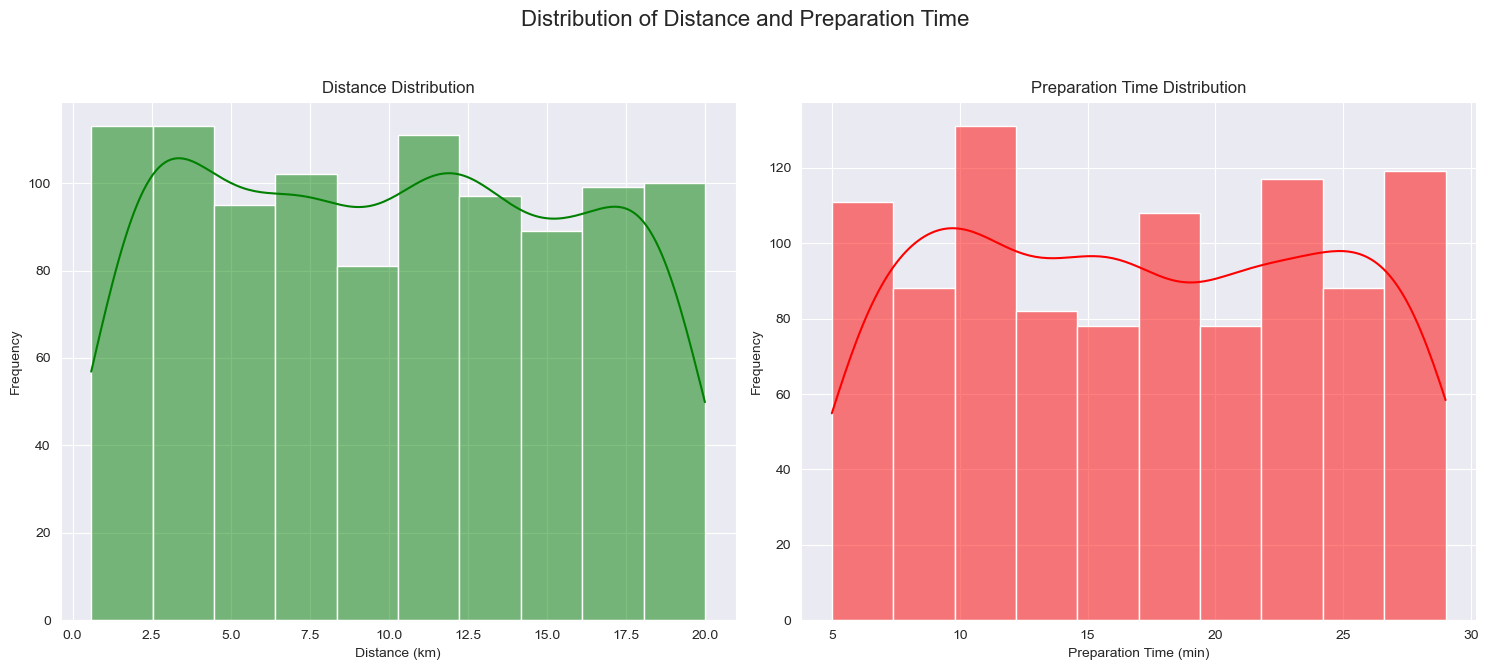

In [20]:
##histogram of Distance_km and Preparation_Time_min  distribution
# Create subplots: 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Distribution of Distance and Preparation Time', fontsize=16)

# Histogram for Distance_km
plt.subplot(121)
sns.histplot(data=data, x='Distance_km', bins=10, kde=True, color='g')
plt.title('Distance Distribution')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')

# Histogram for Preparation_Time_min
plt.subplot(122)
sns.histplot(data=data, x='Preparation_Time_min', bins=10, kde=True, color='r')
plt.title('Preparation Time Distribution')
plt.xlabel('Preparation Time (min)')
plt.ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the main title
plt.show()

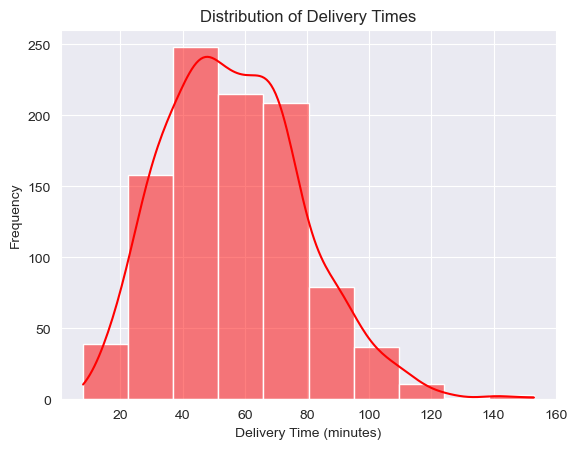

In [21]:
##histogram of Delivery_Time_min  distribution 
sns.histplot(data=data, x='Delivery_Time_min', bins=10, kde=True, color='r')
plt.title('Distribution of Delivery Times')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.show()

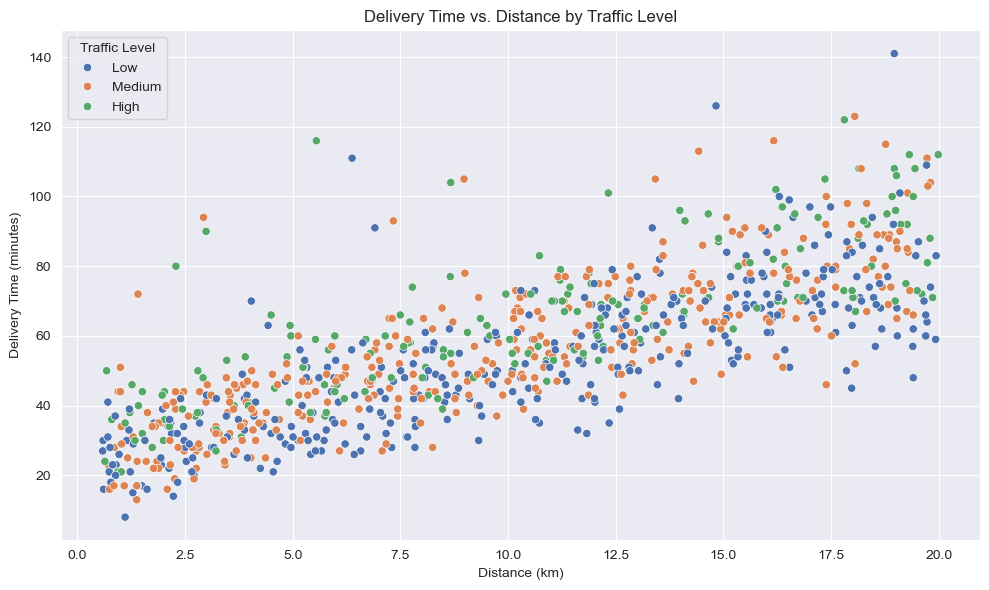

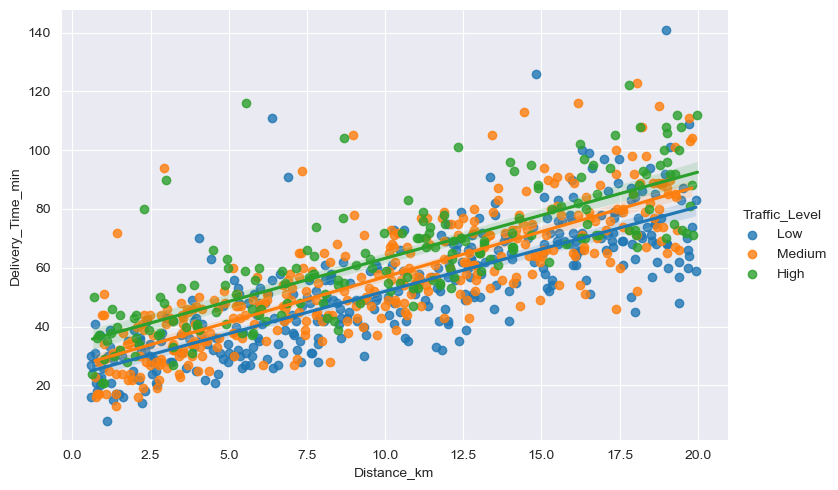

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Distance_km', y='Delivery_Time_min', hue='Traffic_Level', palette='deep')
plt.title('Delivery Time vs. Distance by Traffic Level')
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (minutes)')
plt.grid(True)
plt.legend(title='Traffic Level')
plt.tight_layout()
plt.show()
sns.lmplot(data=df, x='Distance_km', y='Delivery_Time_min', hue='Traffic_Level', aspect=1.5)


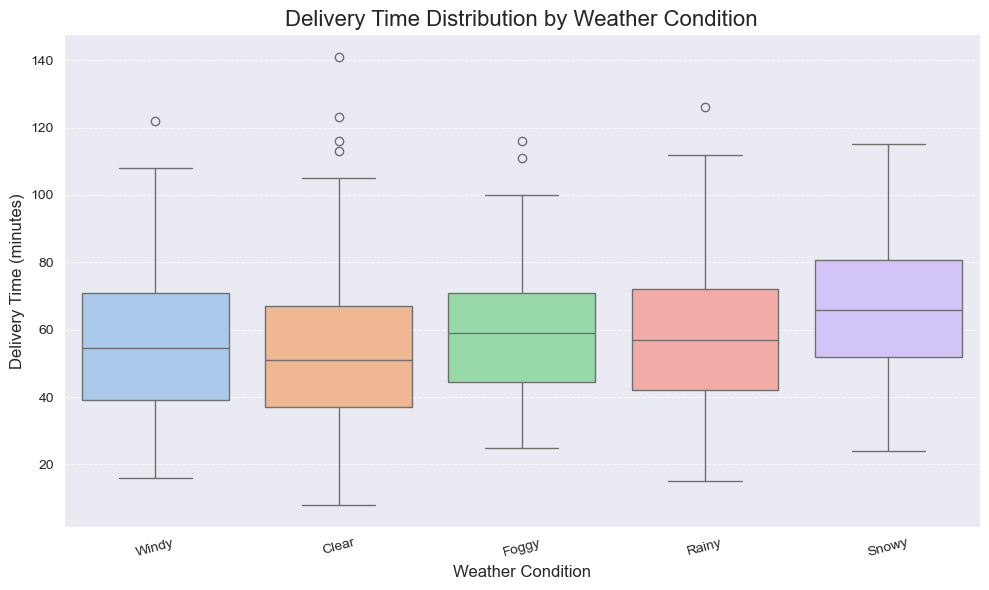

In [23]:
# Create the boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='Weather', y='Delivery_Time_min', palette='pastel')

# Add title and axis labels
plt.title('Delivery Time Distribution by Weather Condition', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Delivery Time (minutes)', fontsize=12)

# Improve grid appearance
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels if they overlap
plt.xticks(rotation=15)

# Adjust layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()

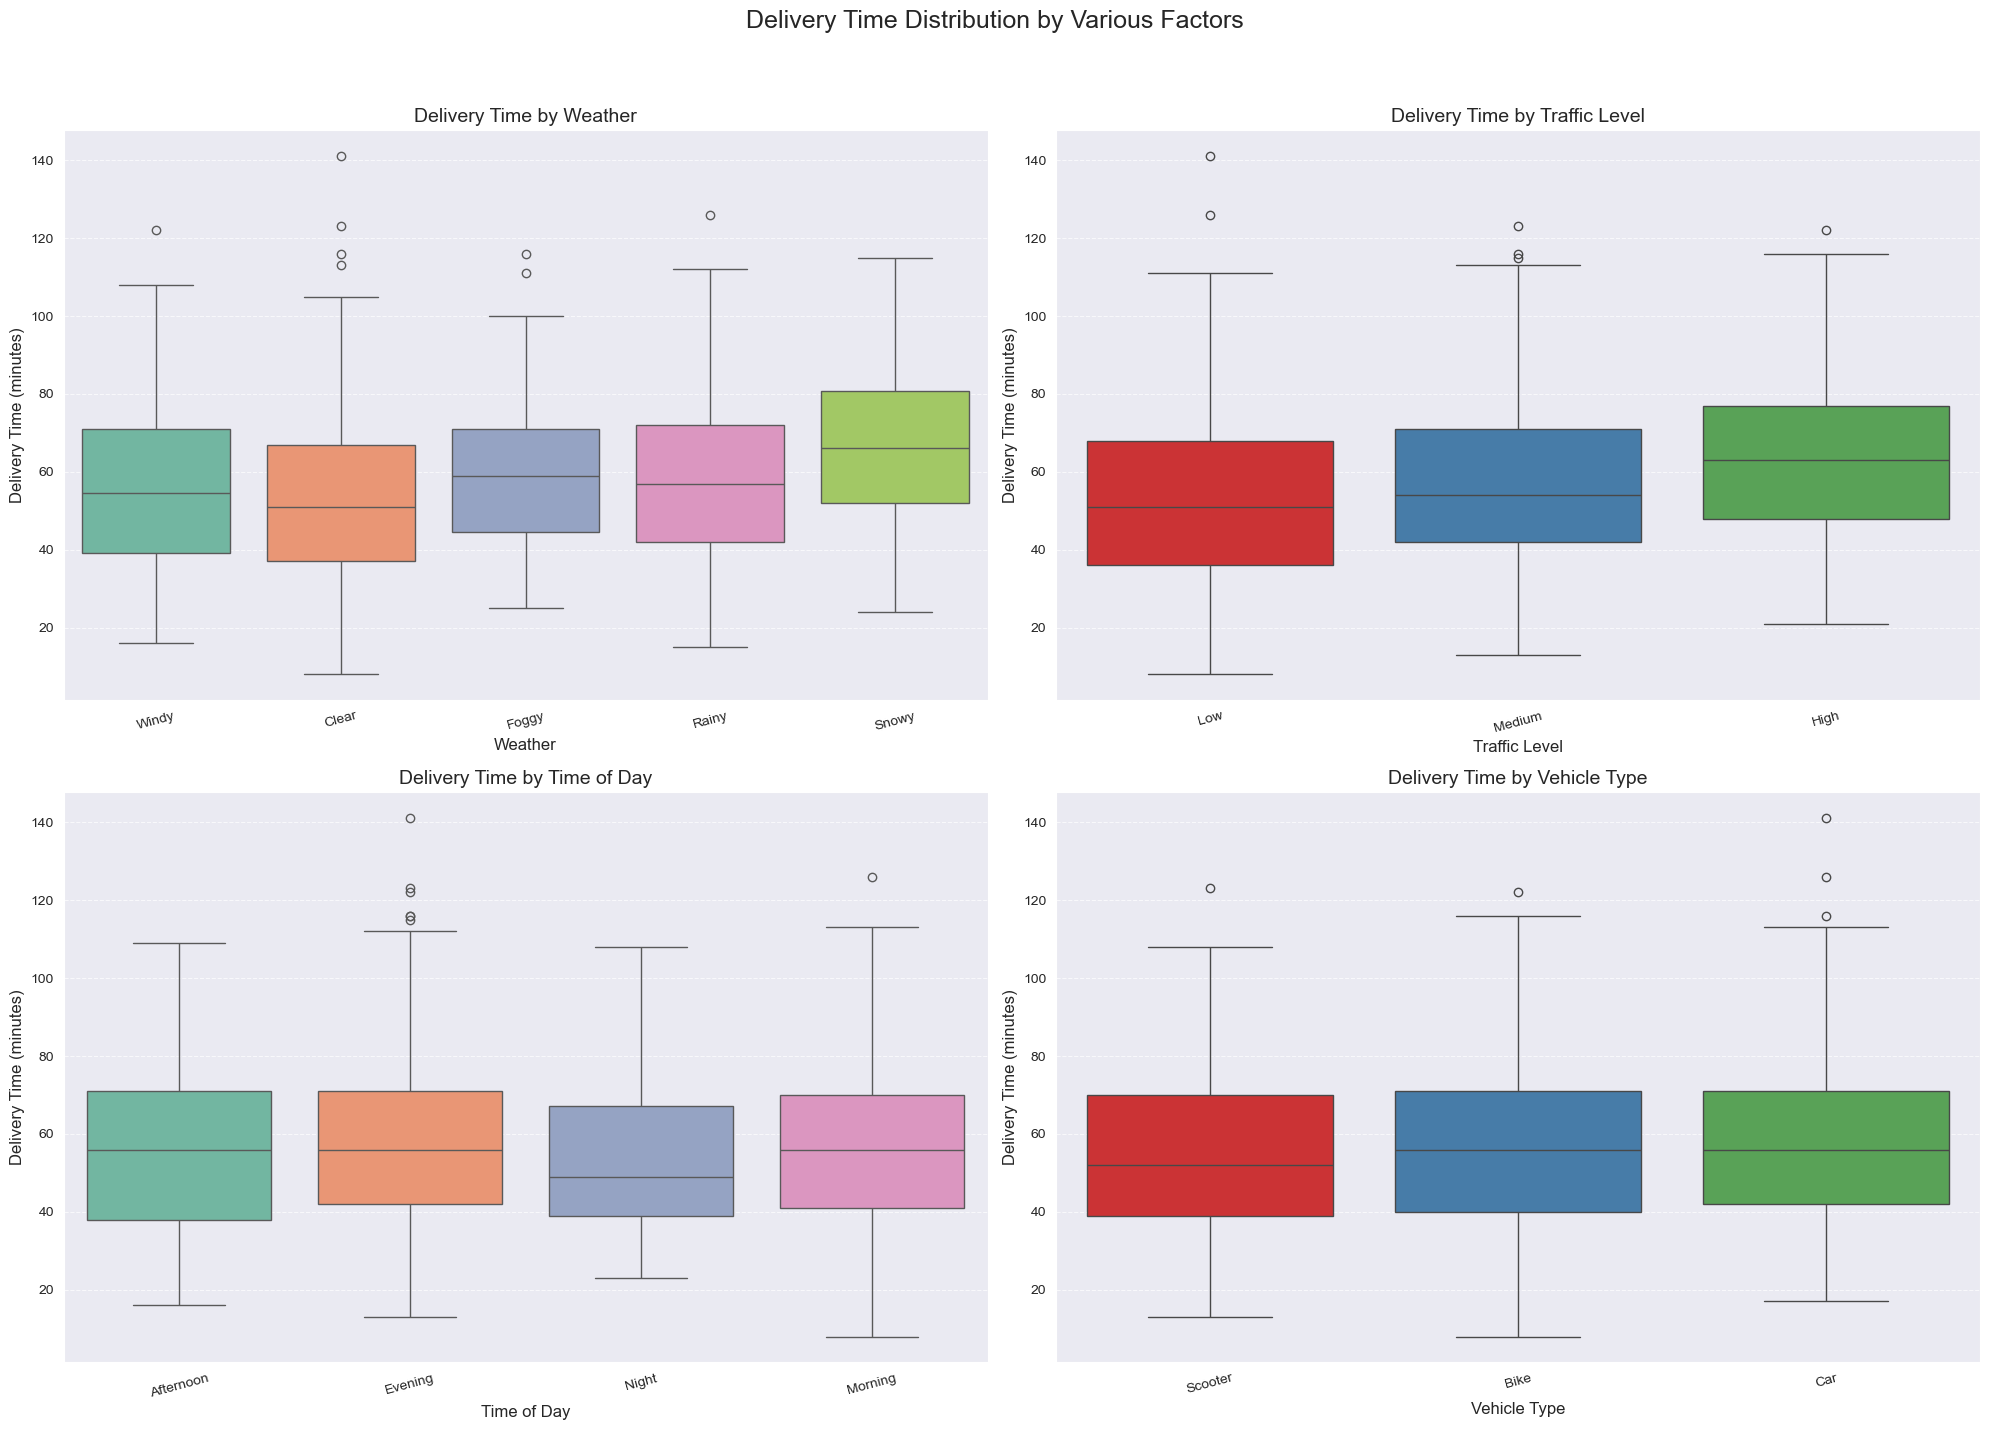

In [24]:
# Create 2x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
axes = ax.flatten()

# Plot 1: Weather
sns.boxplot(data=df, x='Weather', y='Delivery_Time_min', palette='Set2', ax=axes[0])
axes[0].set_title("Delivery Time by Weather", fontsize=14)
axes[0].set_xlabel("Weather", fontsize=12)
axes[0].set_ylabel("Delivery Time (minutes)", fontsize=12)

# Plot 2: Traffic Level
sns.boxplot(data=df, x='Traffic_Level', y='Delivery_Time_min', palette='Set1', ax=axes[1])
axes[1].set_title("Delivery Time by Traffic Level", fontsize=14)
axes[1].set_xlabel("Traffic Level", fontsize=12)
axes[1].set_ylabel("Delivery Time (minutes)", fontsize=12)

# Plot 3: Time of Day
sns.boxplot(data=df, x='Time_of_Day', y='Delivery_Time_min', palette='Set2', ax=axes[2])
axes[2].set_title("Delivery Time by Time of Day", fontsize=14)
axes[2].set_xlabel("Time of Day", fontsize=12)
axes[2].set_ylabel("Delivery Time (minutes)", fontsize=12)

# Plot 4: Vehicle Type
sns.boxplot(data=df, x='Vehicle_Type', y='Delivery_Time_min', palette='Set1', ax=axes[3])
axes[3].set_title("Delivery Time by Vehicle Type", fontsize=14)
axes[3].set_xlabel("Vehicle Type", fontsize=12)
axes[3].set_ylabel("Delivery Time (minutes)", fontsize=12)

# Add gridlines
for axis in axes:
    axis.yaxis.grid(True, linestyle='--', alpha=0.7)
    axis.set_axisbelow(True)
    axis.tick_params(axis='x', rotation=15)

# Optional overall title
fig.suptitle('Delivery Time Distribution by Various Factors', fontsize=18, y=0.98)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

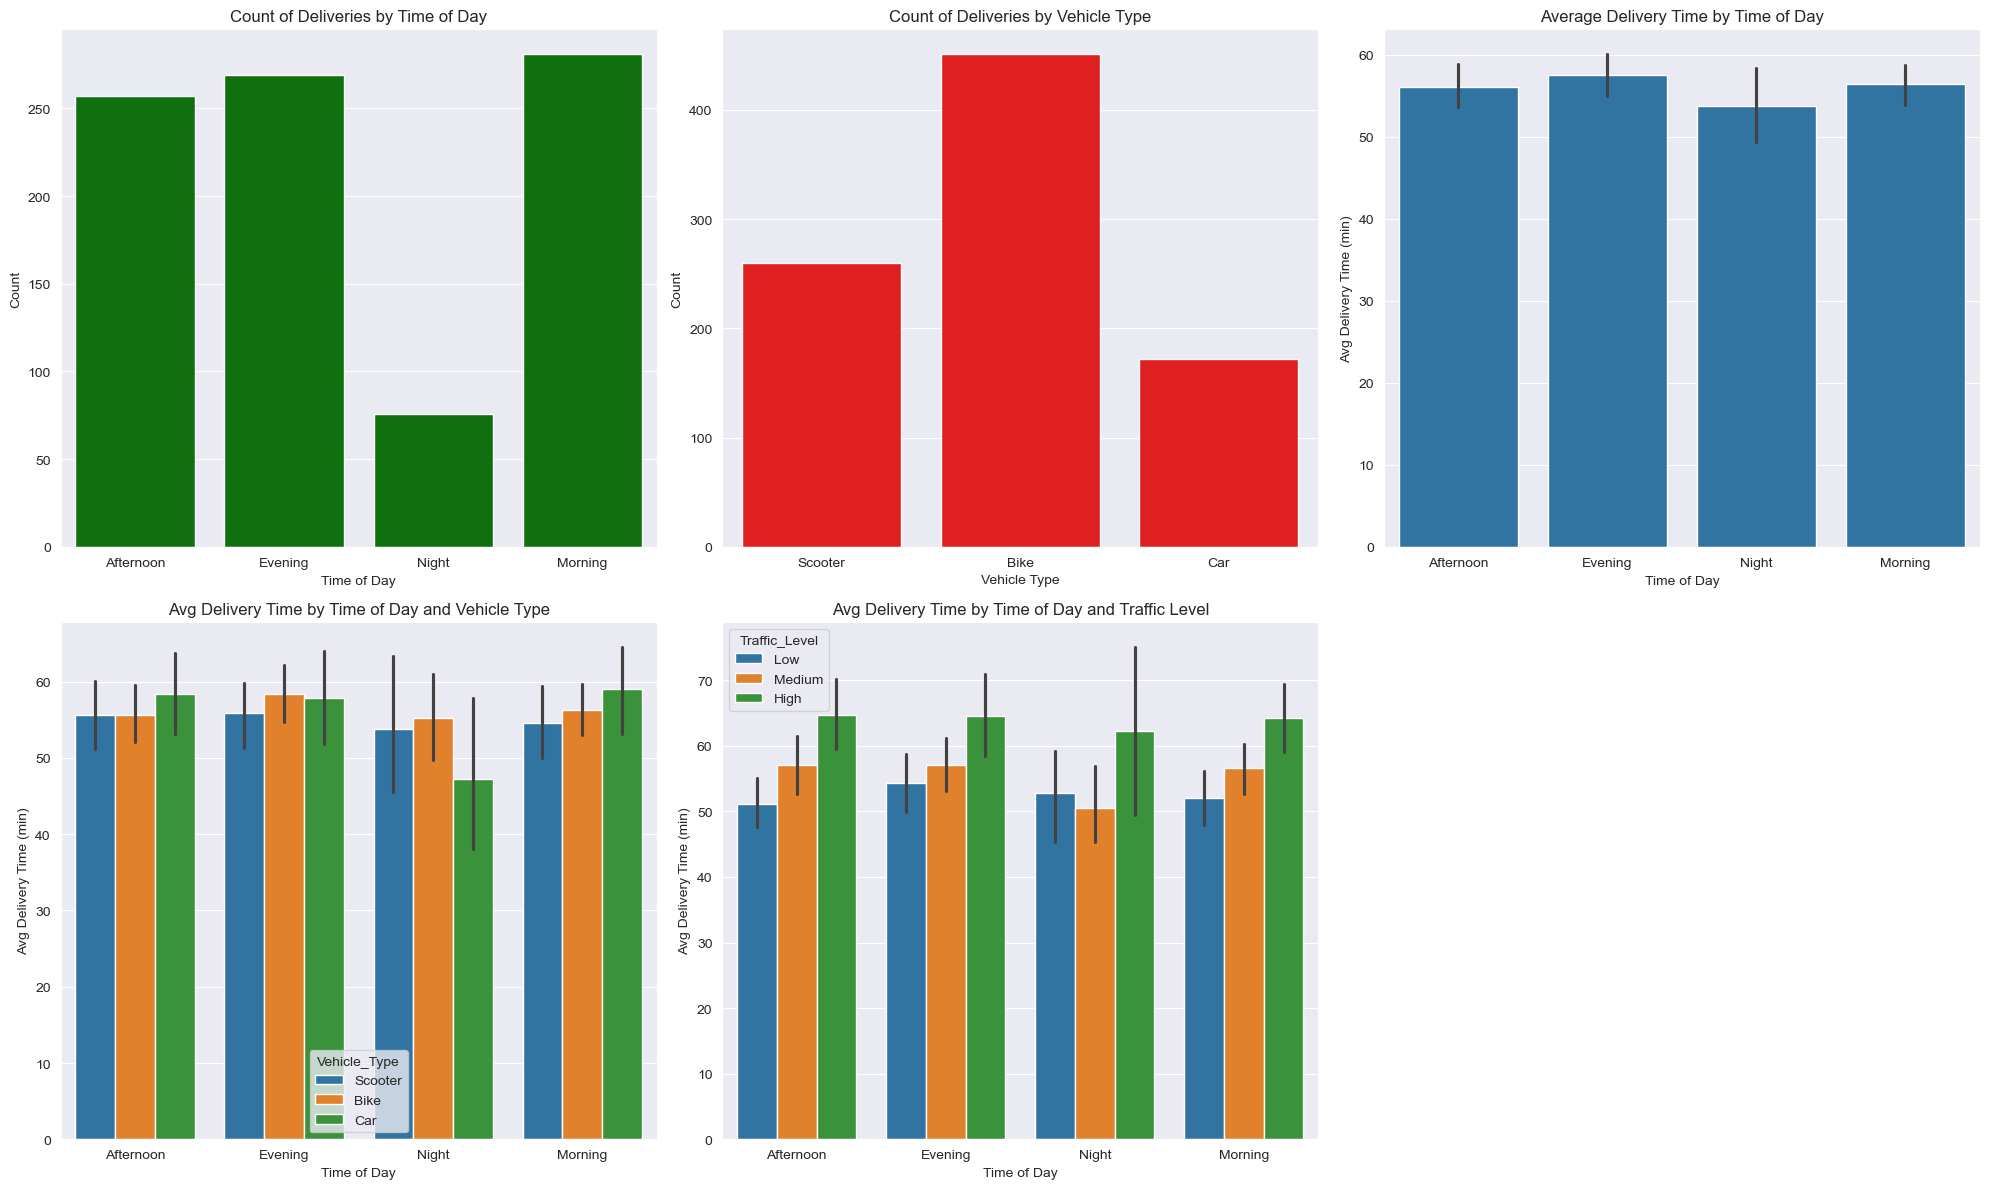

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

# Plot 1: Count of deliveries by Time of Day
sns.countplot(data=df, x='Time_of_Day', color="g", ax=axes[0])
axes[0].set_title('Count of Deliveries by Time of Day')
axes[0].set_xlabel('Time of Day')
axes[0].set_ylabel('Count')

# Plot 2: Count of deliveries by Vehicle Type
sns.countplot(data=df, x='Vehicle_Type', color="r", ax=axes[1])
axes[1].set_title('Count of Deliveries by Vehicle Type')
axes[1].set_xlabel('Vehicle Type')
axes[1].set_ylabel('Count')

# Plot 3: Average Delivery Time by Time of Day
sns.barplot(data=df, x='Time_of_Day', y='Delivery_Time_min', estimator='mean', ax=axes[2])
axes[2].set_title('Average Delivery Time by Time of Day')
axes[2].set_xlabel('Time of Day')
axes[2].set_ylabel('Avg Delivery Time (min)')

# Plot 4: Avg Delivery Time by Time of Day & Vehicle Type
sns.barplot(data=df, x='Time_of_Day', y='Delivery_Time_min', hue='Vehicle_Type', estimator='mean', ax=axes[3])
axes[3].set_title('Avg Delivery Time by Time of Day and Vehicle Type')
axes[3].set_xlabel('Time of Day')
axes[3].set_ylabel('Avg Delivery Time (min)')

# Plot 5: Avg Delivery Time by Time of Day & Traffic Level
sns.barplot(data=df, x='Time_of_Day', y='Delivery_Time_min', hue='Traffic_Level', estimator='mean', ax=axes[4])
axes[4].set_title('Avg Delivery Time by Time of Day and Traffic Level')
axes[4].set_xlabel('Time of Day')
axes[4].set_ylabel('Avg Delivery Time (min)')

# Hide the empty 6th subplot (if desired)
fig.delaxes(axes[5])

# Adjust layout
plt.tight_layout()
plt.show()

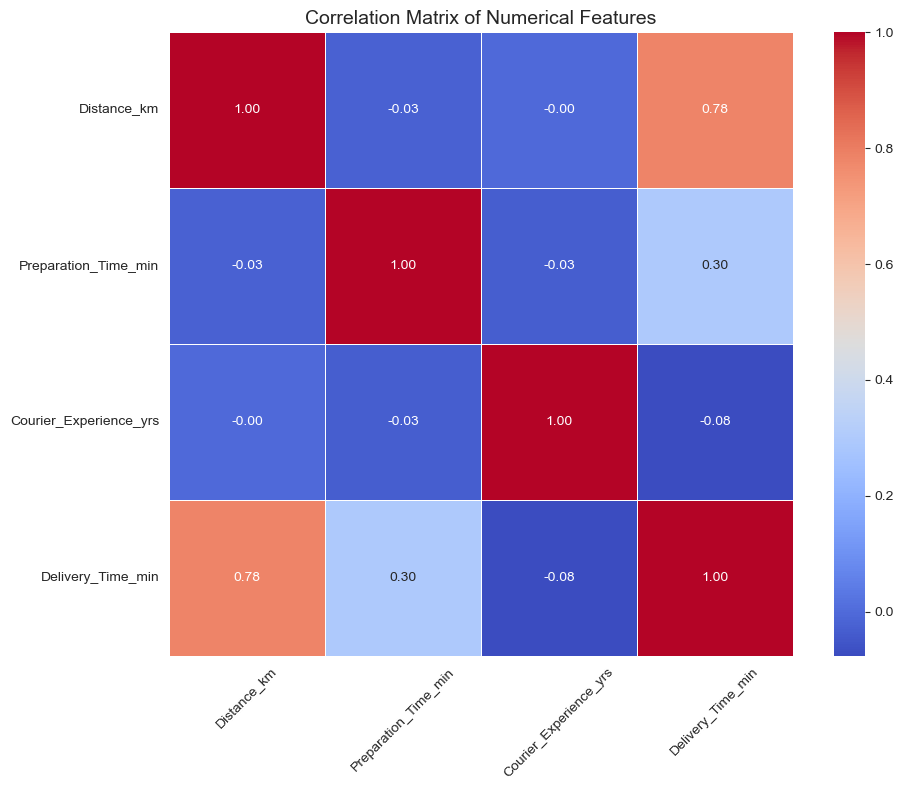

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True)

plt.title('Correlation Matrix of Numerical Features', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### FEATURE ENGINEERING

In [27]:
data.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [28]:
#we dont need order id
data = data.drop('Order_ID', axis=1)
data.head(5)

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [29]:
numeric_features = [feature for feature in data.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if df[feature].dtype == 'O']

In [30]:
##check missing values
data.isna().sum()

Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [31]:
categorical_features

['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

In [32]:
for i in categorical_features:
    print(data[i].unique())
    print('-' * 50)

['Windy' 'Clear' 'Foggy' 'Rainy' 'Snowy' nan]
--------------------------------------------------
['Low' 'Medium' 'High' nan]
--------------------------------------------------
['Afternoon' 'Evening' 'Night' 'Morning' nan]
--------------------------------------------------
['Scooter' 'Bike' 'Car']
--------------------------------------------------


In [33]:
#check the value count for each column to replace the missing values
for i in categorical_features:
    print(data[i].value_counts())
    print('-' * 50)

Weather
Clear    470
Rainy    204
Foggy    103
Snowy     97
Windy     96
Name: count, dtype: int64
--------------------------------------------------
Traffic_Level
Medium    390
Low       383
High      197
Name: count, dtype: int64
--------------------------------------------------
Time_of_Day
Morning      308
Evening      293
Afternoon    284
Night         85
Name: count, dtype: int64
--------------------------------------------------
Vehicle_Type
Bike       503
Scooter    302
Car        195
Name: count, dtype: int64
--------------------------------------------------


In [34]:
categorical_features[:-1]

['Weather', 'Traffic_Level', 'Time_of_Day']

In [35]:
#fill the columns that have missing values with their mode
for i in categorical_features[:-1]:
    data[i] = data[i].fillna(data[i].mode()[0])


In [36]:
##If mean ≈ median → use mean.
##If mean ≠ median (big difference) → use median.

data['Courier_Experience_yrs'].describe()

count    970.000000
mean       4.579381
std        2.914394
min        0.000000
25%        2.000000
50%        5.000000
75%        7.000000
max        9.000000
Name: Courier_Experience_yrs, dtype: float64

In [37]:
data['Courier_Experience_yrs'].median()

5.0

In [38]:
##mean and median are similar
data['Courier_Experience_yrs'] = data['Courier_Experience_yrs'].fillna(data['Courier_Experience_yrs'].mean())


In [39]:
# Loop through columns and apply IQR filtering
for col in numeric_features :
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    #  print how many rows are outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

Distance_km: 0 outliers
Preparation_Time_min: 0 outliers
Courier_Experience_yrs: 0 outliers
Delivery_Time_min: 6 outliers


In [40]:

Q1 = data['Delivery_Time_min'].quantile(0.25)
Q3 = data['Delivery_Time_min'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


#  print how many rows are outliers
#show outlier by showing where we have lower than lower bound and higher than higher bound
outliers = data[(data['Delivery_Time_min'] < lower_bound) | (data['Delivery_Time_min'] > upper_bound)]
outliers

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
29,18.05,Clear,Medium,Evening,Scooter,10,7.0,123
127,18.97,Clear,Low,Evening,Car,25,4.0,141
379,18.46,Clear,Medium,Morning,Scooter,29,1.0,153
452,15.64,Rainy,Low,Morning,Bike,20,4.0,141
784,14.83,Rainy,Low,Morning,Car,19,4.0,126
924,17.81,Windy,High,Evening,Bike,21,4.0,122


In [41]:
##shows where values greater higher lower bound and lower than upper bound
data = data[(data['Delivery_Time_min'] >= lower_bound) & (data['Delivery_Time_min'] <= upper_bound)]
data.shape

(994, 8)

In [42]:
##check for multicollinearity
def correlation(dataset, threshold):
    # Store columns with correlations above threshold and their paired columns
    high_corr_cols = set()
    high_corr_pairs = []
    
    # Calculate correlation matrix once
    corr_matrix = dataset.corr()
    
    # Find columns with high correlation and identify the pairs
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_i = corr_matrix.columns[i]
                col_j = corr_matrix.columns[j]
                corr_value = corr_matrix.iloc[i,j]
                
                # Add both columns to the set of high correlation columns
                high_corr_cols.add(col_i)
                high_corr_cols.add(col_j)
                
                # Store the pair and their correlation value
                high_corr_pairs.append((col_i, col_j, corr_value))
    
    # Calculate VIF for numeric columns if statsmodels is available
    try:
        from statsmodels.stats.outliers_influence import variance_inflation_factor
        numeric_data = dataset.select_dtypes(include=[np.number]).dropna()
        
        # Calculate VIF values
        vif_values = {}
        for i, column in enumerate(numeric_data.columns):
            vif_values[column] = variance_inflation_factor(numeric_data.values, i)
        
        # Return comprehensive results
        return {
            'high_corr_columns': high_corr_cols,
            'high_corr_pairs': high_corr_pairs,
            'vif_values': vif_values
        }
    
    except ImportError:
        # If statsmodels is not available, just return correlation results
        return {
            'high_corr_columns': high_corr_cols,
            'high_corr_pairs': high_corr_pairs
        }


In [43]:
##set threshold,lower values than 5 means they are not collinear 
correlation(data[numeric_features[:-1]], 0.85)

{'high_corr_columns': set(),
 'high_corr_pairs': [],
 'vif_values': {'Distance_km': 3.0420082833402065,
  'Preparation_Time_min': 3.4875583128548366,
  'Courier_Experience_yrs': 2.7573643970076853}}

In [44]:
X = data.drop('Delivery_Time_min', axis= 1)
y = data['Delivery_Time_min']

In [45]:
X

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs
0,7.93,Windy,Low,Afternoon,Scooter,12,1.0
1,16.42,Clear,Medium,Evening,Bike,20,2.0
2,9.52,Foggy,Low,Night,Scooter,28,1.0
3,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0
4,19.03,Clear,Low,Morning,Bike,16,5.0
...,...,...,...,...,...,...,...
995,8.50,Clear,High,Evening,Car,13,3.0
996,16.28,Rainy,Low,Morning,Scooter,8,9.0
997,15.62,Snowy,High,Evening,Scooter,26,2.0
998,14.17,Clear,Low,Afternoon,Bike,8,0.0


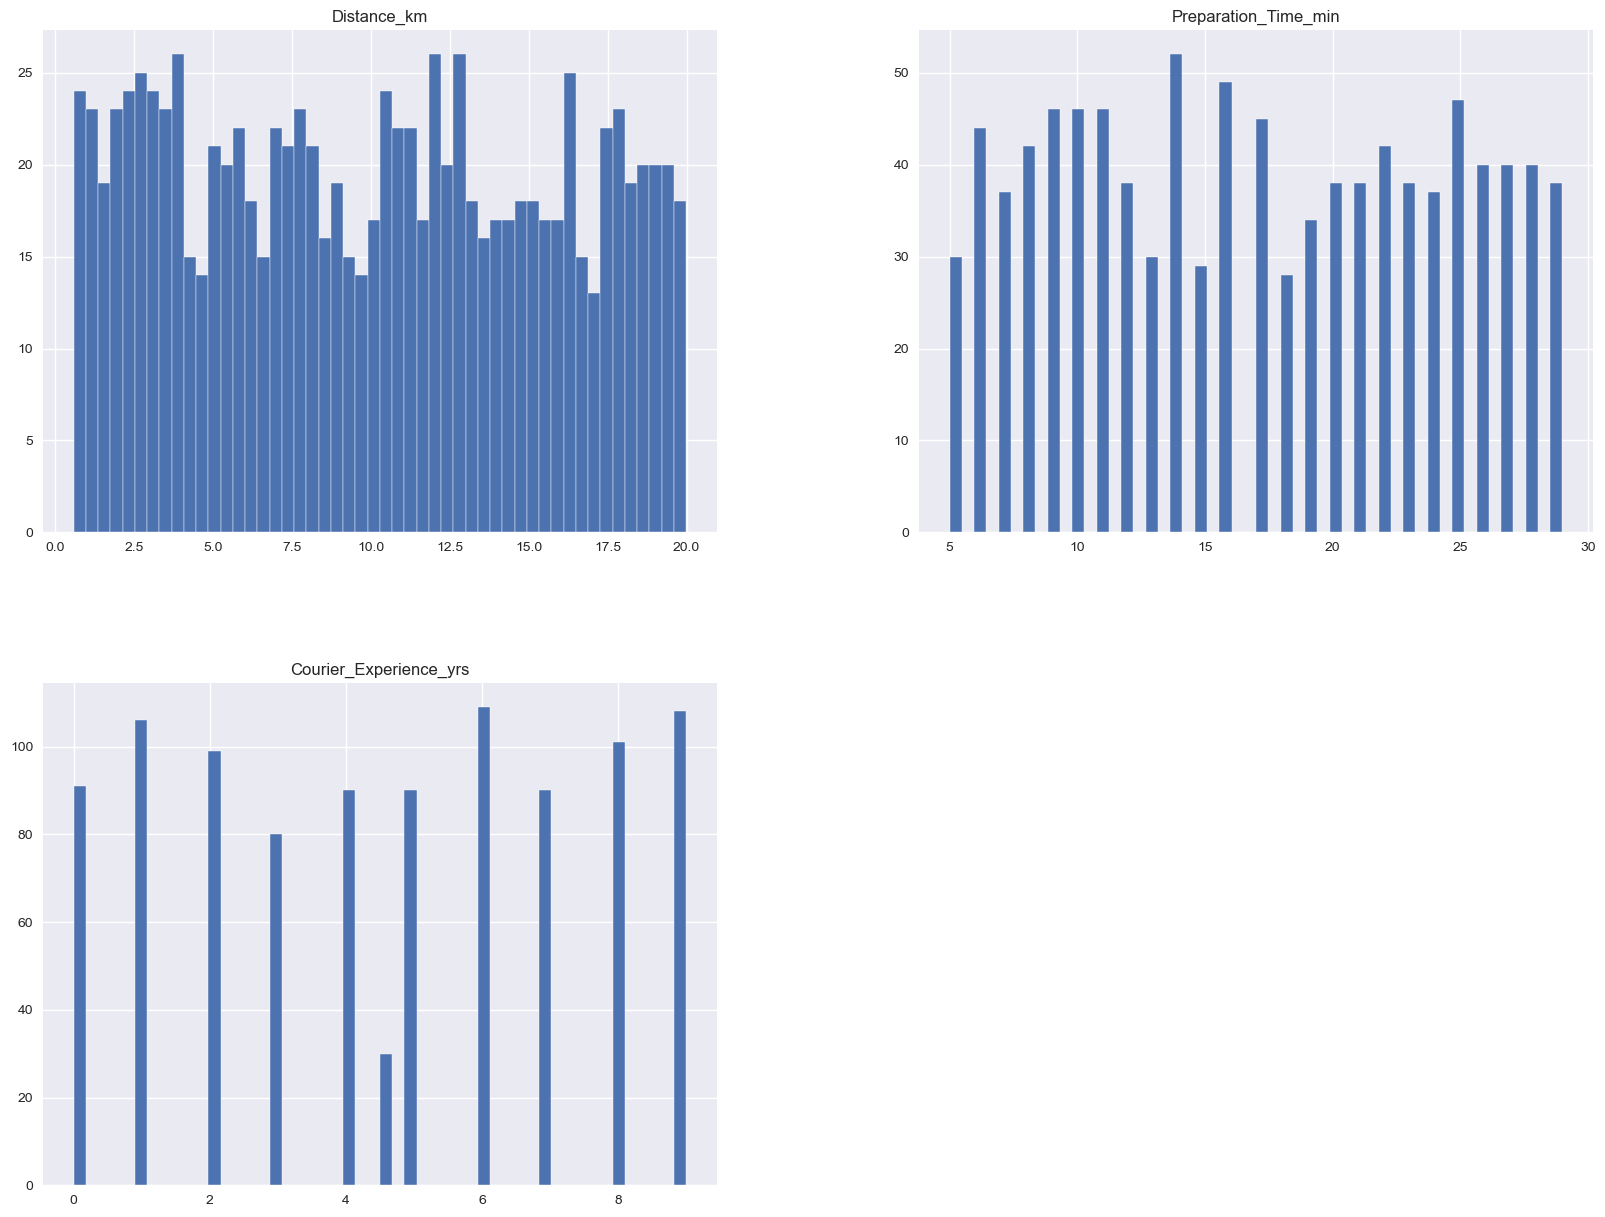

In [46]:
##plot density for all numerical  feature
plt.style.use('seaborn-v0_8')
X.hist(bins = 50, figsize=(20,15))
plt.show()

### Model Training

In [47]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [48]:
X.columns

Index(['Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs'],
      dtype='object')

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestRegressor  # Example model

# Define your features
numeric_features = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']
categorical_features = ['Vehicle_Type']
target_features = ['Weather', 'Time_of_Day']

# Define transformers
#scale the numeric feature 
numeric_transformer = StandardScaler()
##use cat transormer for the vehicle type, it has three unique object, hence not so much curse of dimensionality
categorical_transformer = OneHotEncoder(drop='first')  # drop first category to avoid dummy variable trap

##target encoder for unique object with more than four values, i.e 'Weather', and 'Time_of_Day', this helps reduce the dimensionality
target_encoder = TargetEncoder()  # Using default smoothing parameter

# Custom order for traffic levels
traffic_order = [['Low', 'Medium', 'High']]
traffic_encoder = OrdinalEncoder(categories=traffic_order)

# Create preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('StandardScaler', numeric_transformer, numeric_features),
        ('OneHotEncoder', categorical_transformer, categorical_features),
        ('targetenc', target_encoder, target_features),
        ('trafficenc',traffic_encoder,['Traffic_Level'] )
    ],
    remainder='passthrough'  # Pass through any other columns not specified
)




In [50]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape, X_test.shape

((695, 7), (299, 7))

In [51]:
X_train = preprocessor.fit_transform(X_train, y_train)

X_test = preprocessor.transform(X_test)

In [52]:
X_train

array([[ 7.03041300e-01, -9.91576638e-04, -1.24879038e+00, ...,
         5.39913793e+01,  5.64461539e+01,  1.00000000e+00],
       [-5.61049499e-01, -1.65494141e+00,  1.18129357e+00, ...,
         5.39913793e+01,  5.64461539e+01,  1.00000000e+00],
       [ 1.35461619e+00,  1.65295825e+00, -2.07325831e-01, ...,
         6.71276583e+01,  5.76446281e+01,  0.00000000e+00],
       ...,
       [-1.09899825e+00,  5.50325034e-01,  1.39829020e-01, ...,
         5.39913793e+01,  5.64461539e+01,  1.00000000e+00],
       [ 5.96516795e-01, -1.10362480e+00,  8.34138722e-01, ...,
         5.98803980e+01,  5.70252525e+01,  2.00000000e+00],
       [ 1.51262754e+00, -2.76649882e-01, -9.01635532e-01, ...,
         5.39913793e+01,  5.70252525e+01,  1.00000000e+00]])

In [53]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [54]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 9.9476
- Mean Absolute Error: 6.4382
- R2 Score: 0.7756
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.8832
- Mean Absolute Error: 6.0033
- R2 Score: 0.8335


Lasso
Model performance for Training set
- Root Mean Squared Error: 10.2058
- Mean Absolute Error: 6.8403
- R2 Score: 0.7638
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9.2288
- Mean Absolute Error: 6.4250
- R2 Score: 0.8203


Ridge
Model performance for Training set
- Root Mean Squared Error: 9.9476
- Mean Absolute Error: 6.4429
- R2 Score: 0.7756
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.8854
- Mean Absolute Error: 6.0092
- R2 Score: 0.8334


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 9.8949
- Mean Absolute Error: 7.2265
- R2 Score: 0.7780
----------------------

In [55]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.833488
2,Ridge,0.833404
1,Lasso,0.820279
7,CatBoosting Regressor,0.800658
5,Random Forest Regressor,0.795136
3,K-Neighbors Regressor,0.746743
6,XGBRegressor,0.741757
4,Decision Tree,0.612819
8,AdaBoost Regressor,0.597892


In [56]:
linearreg = LinearRegression()
linearreg = linearreg.fit(X_train, y_train)
y_pred = linearreg.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 83.35


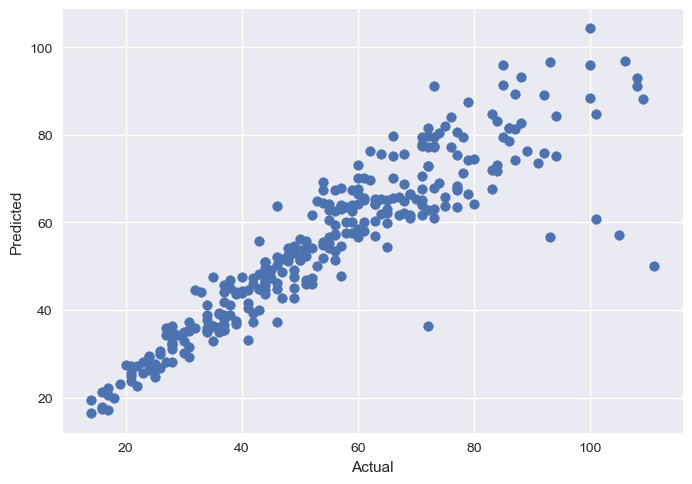

In [57]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

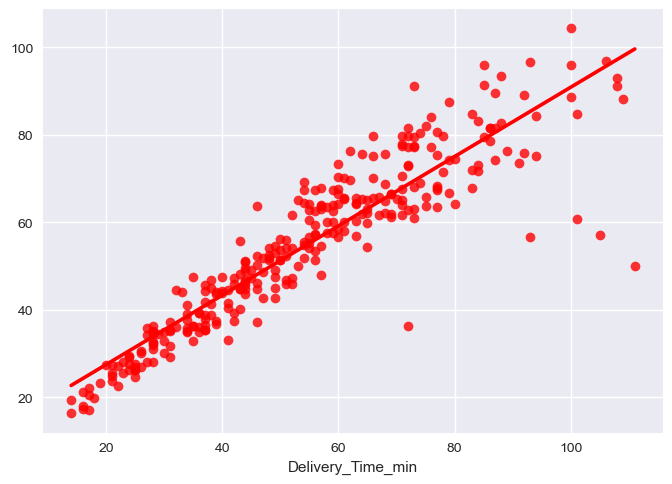

In [58]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [59]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
925,28,34.486342,-6.486342
529,57,67.866888,-10.866888
571,63,60.375311,2.624689
660,44,43.721596,0.278404
932,34,34.925003,-0.925003
...,...,...,...
542,44,50.923212,-6.923212
525,86,81.563959,4.436041
526,43,44.736004,-1.736004
391,67,61.760355,5.239645


### CODE EXPLANATION

In [60]:
data

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...
995,8.50,Clear,High,Evening,Car,13,3.0,54
996,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


In [61]:
data.reset_index(drop=True,inplace = True)

In [62]:
df = data.T

In [63]:
df

,0,1,2,3,4,5,6,7,8,9,...,984,985,986,987,988,989,990,991,992,993
Distance_km,7.93,16.42,9.52,7.44,19.03,19.4,9.52,17.39,1.78,10.62,...,17.97,17.53,12.43,10.89,4.37,8.5,16.28,15.62,14.17,6.63
Weather,Windy,Clear,Foggy,Rainy,Clear,Clear,Clear,Clear,Snowy,Foggy,...,Windy,Clear,Rainy,Windy,Clear,Clear,Rainy,Snowy,Clear,Foggy
Traffic_Level,Low,Medium,Low,Medium,Low,Low,Low,Medium,Low,Low,...,Medium,Low,High,Medium,Medium,High,Low,High,Low,Low
Time_of_Day,Afternoon,Evening,Night,Afternoon,Morning,Evening,Morning,Evening,Evening,Evening,...,Morning,Afternoon,Morning,Evening,Evening,Evening,Morning,Evening,Afternoon,Night
Vehicle_Type,Scooter,Bike,Scooter,Scooter,Bike,Scooter,Bike,Scooter,Car,Scooter,...,Scooter,Bike,Bike,Bike,Scooter,Car,Scooter,Scooter,Bike,Scooter
Preparation_Time_min,12,20,28,5,16,8,12,5,20,29,...,28,14,13,7,6,13,8,26,8,24
Courier_Experience_yrs,1.0,2.0,1.0,1.0,5.0,9.0,1.0,6.0,6.0,1.0,...,7.0,6.0,6.0,0.0,7.0,3.0,9.0,2.0,0.0,3.0
Delivery_Time_min,43,84,59,37,68,57,49,46,35,73,...,92,79,70,58,25,54,71,81,55,58


In [64]:
print(df.to_json)

<bound method NDFrame.to_json of                               0        1        2          3        4    \
Distance_km                  7.93    16.42     9.52       7.44    19.03   
Weather                     Windy    Clear    Foggy      Rainy    Clear   
Traffic_Level                 Low   Medium      Low     Medium      Low   
Time_of_Day             Afternoon  Evening    Night  Afternoon  Morning   
Vehicle_Type              Scooter     Bike  Scooter    Scooter     Bike   
Preparation_Time_min           12       20       28          5       16   
Courier_Experience_yrs        1.0      2.0      1.0        1.0      5.0   
Delivery_Time_min              43       84       59         37       68   

                            5        6        7        8        9    ...  \
Distance_km                19.4     9.52    17.39     1.78    10.62  ...   
Weather                   Clear    Clear    Clear    Snowy    Foggy  ...   
Traffic_Level               Low      Low   Medium      Low     

### COMPONENTS

In [1]:
import os
import json
import logging
import sys
from io import StringIO 
from pathlib import Path
import pymongo

In [2]:
##create a folder to store all .py files
## Set up folders and paths

source_folder = Path("src")
source_folder.mkdir(exist_ok=True)
(source_folder / "__init__.py").touch()
(source_folder / "components").mkdir(parents=True, exist_ok=True)
(source_folder / "components" / "__init__.py").touch()

sys.path.append(str(source_folder.resolve()))

In [3]:
%%writefile src/test_connection.py


from pymongo.mongo_client import MongoClient

uri = "mongodb+srv://captgt007:<password>@cluster0.gl4fnyr.mongodb.net/?retryWrites=true&w=majority&appName=Cluster0"

# Create a new client and connect to the server
client = MongoClient(uri)

# Send a ping to confirm a successful connection
try:
    client.admin.command('ping')
    print("Pinged your deployment. You successfully connected to MongoDB!")
except Exception as e:
    print(e)

Overwriting src/test_connection.py


In [73]:
!python -m src.test_connection

Pinged your deployment. You successfully connected to MongoDB!


In [4]:
%%writefile src/logger.py
# Create logger.py
import logging
import os
from datetime import datetime

LOG_FILE = f"{datetime.now().strftime('%m_%d_%Y_%H_%M_%S')}.log"
logs_dir = os.path.join(os.getcwd(), "logs")
os.makedirs(logs_dir, exist_ok=True)

LOG_FILE_PATH = os.path.join(logs_dir, LOG_FILE)

logging.basicConfig(
    filename=LOG_FILE_PATH,
    format="[ %(asctime)s ] %(lineno)d %(name)s - %(levelname)s - %(message)s",
    level=logging.INFO,
)

Overwriting src/logger.py


In [5]:
%%writefile src/push_data.py

## this file pushes the data from my local machine to the mongo db
import os
import sys
import json
import certifi
from dotenv import load_dotenv
load_dotenv()
import pandas as pd
import numpy as np
from pymongo import MongoClient  # Changed to direct import for better Python 3.12 compatibility
from dataclasses import dataclass  # Missing import for dataclass
from src.logger import logging

MONGO_DB_URL = os.getenv("MONGO_DB_URL")
ca = certifi.where()

# This creates a simple class that holds detail:
@dataclass
class DataExtractConfig:
    source_data_path: str = "Food_Delivery_Times.csv"
    database = "captgt007" #name of database on mongo db
    collection = "delivery_time" #this is a random name and can be changed
    
class DataExtract():
    def __init__(self):
        # inherit all from dataextractconfig
        self.ingestion_config = DataExtractConfig()
        
    def csv_to_json(self):
        try:
            # reads data and drops the index so it doesnt affect the json type 
            data = pd.read_csv(self.ingestion_config.source_data_path)
            data.reset_index(drop=True, inplace=True)
            # convert the csv file to json style format
            records = list(json.loads(data.T.to_json()).values())
            return records
        
        except Exception as e:
            logging.error(f"Error during data reading: {e}")
            raise Exception(f"Error loading the file path: {e}")
    
    def push_data_mongodb(self, records):
        try:
            database_name = self.ingestion_config.database
            collection_name = self.ingestion_config.collection
            
            # Use certifi for secure connection
            self.mongo_client = MongoClient(MONGO_DB_URL, tlsCAFile=ca)
            
            database = self.mongo_client[database_name]
            collection = database[collection_name]  
            collection.insert_many(records)
            
            return len(records)
        
        except Exception as e:
            logging.error(f"Error shipping or uploading data: {e}")
            raise Exception(f"Error sending the data: {e}") 

if __name__ == "__main__":
    data_extract_object = DataExtract()
    records = data_extract_object.csv_to_json()
    print("Successfully transformed object from csv to json")
    no_of_records = data_extract_object.push_data_mongodb(records)
    print(f"Successfully inserted {no_of_records} records into MongoDB")

Overwriting src/push_data.py


In [6]:
!python -m src.push_data

Successfully transformed object from csv to json
Successfully inserted 1000 records into MongoDB


In [7]:
(source_folder / "constants").mkdir(parents=True, exist_ok=True)
(source_folder / "constants" / "__init__.py").touch()


In [8]:
os.makedirs(os.path.dirname("data_schema/schema.yaml"), exist_ok=True)


In [9]:
%%writefile data_schema/schema.yaml

##write schema for the data type to compare later

columns:
- Order_ID: int64
- Distance_km: float64
- Weather: object 
- Traffic_Level: object
- Time_of_Day: object 
- Vehicle_Type: object 
- Preparation_Time_min: int64  
- Courier_Experience_yrs: float64
- Delivery_Time_min: int64 


numerical_columns:
- Order_ID: int64
- Distance_km: float64 
- Preparation_Time_min: int64  
- Courier_Experience_yrs: float64
- Delivery_Time_min: int64 

categorical_columns:
- Weather: object 
- Traffic_Level: object
- Time_of_Day: object 
- Vehicle_Type: object 





Overwriting data_schema/schema.yaml


### DATA INGESTION

In [10]:
%%writefile src/constants/training_pipeline_names.py

##this file store the required details needed 
import os
import sys
import numpy as np
import pandas as pd

"""
Data ingestion related constants, such as database name,collcetion, train test split ratio
"""
DATA_INGESTION_COLLECTION_NAME :str = "delivery_time"
DATA_INGESTION_DATABASE_NAME :str = "captgt007"
DATA_INGESTION_DIR_NAME :str = "data_ingestion"
DATA_INGESTION_FEATURE_STORE_DIR :str = "feature_store"
DATA_INGESTION_INGESTED_DIR :str = "ingested"
DATA_INGESTION_TRAIN_TEST_SPLIT_RATIO :float = 0.2

"""
common constant variable
"""
TARGET_COLUMN = "Delivery_Time_min"
PIPELINE_NAME :str = "Delivery_details"
ARTIFACT_DIR = "Artifacts"
FILE_NAME : str = "Food_Delivery_Times.csv"
TRAIN_FILE_NAME:str = "train.csv"
TEST_FILE_NAME:str = "test.csv"

SCHEMA_FILE_PATH = os.path.join("data_schema", "schema.yaml")

"""

DATA VALIDATION related constant
"""

DATA_VALIDATION_DIR_NAME : str = "data_invalidation"
DATA_VALIDATION_VALID_DIR : str = "validated"
DATA_VALIDATION_INVALID_DIR: str = "invalid"
DATA_VALIDATION_DRIFT_REPORT_DIR: str = "drift_report"
DATA_VALIDATION_DRIFT_REPORT_FILE_NAME: str = "report.yaml"

Overwriting src/constants/training_pipeline_names.py


In [11]:
%%writefile src/constants/config_entity.py


from datetime import datetime
import os
from src.constants import training_pipeline_names

##create the configured names using the require details
class TrainingPipelineConfig:
    def __init__(self, timestamp = datetime.now()):
        timestamp = timestamp.strftime("%m_%d_%Y_%H_%M_%S")
        self.pipeline_name = training_pipeline_names.PIPELINE_NAME
        self.artifact_name = training_pipeline_names.ARTIFACT_DIR
        self.artifact_dir = os.path.join(self.artifact_name, timestamp)
        self.timestamp:str = timestamp

class DataIngestionConfig:
    def __init__(self, training_pipeline_config:TrainingPipelineConfig):
        self.data_ingestion_dir:str = os.path.join(
            training_pipeline_config.artifact_dir, training_pipeline_names.DATA_INGESTION_DIR_NAME
        )
        self.feature_store_file_path:str = os.path.join(
          self.data_ingestion_dir, training_pipeline_names.DATA_INGESTION_FEATURE_STORE_DIR, training_pipeline_names.FILE_NAME
        )
        self.training_file_path:str = os.path.join(
            self.data_ingestion_dir, training_pipeline_names.DATA_INGESTION_INGESTED_DIR, training_pipeline_names.TRAIN_FILE_NAME
        )
        self.testing_file_path:str = os.path.join(
            self.data_ingestion_dir, training_pipeline_names.DATA_INGESTION_INGESTED_DIR, training_pipeline_names.TEST_FILE_NAME
        )
        self.train_test_split_ratio = training_pipeline_names.DATA_INGESTION_TRAIN_TEST_SPLIT_RATIO
        self.collection_name = training_pipeline_names.DATA_INGESTION_COLLECTION_NAME
        self.database_name = training_pipeline_names.DATA_INGESTION_DATABASE_NAME

Overwriting src/constants/config_entity.py


In [12]:
%%writefile src/constants/artifact_entity.py

from dataclasses import dataclass 

@dataclass
class DataIngestionArtifact:
    train_file_path: str
    test_file_path: str

@dataclass
class DataValidationArtifact:
    validation_status: bool
    valid_train_file_path: str
    valid_test_file_path: str
    invalid_train_file_path: str
    invalid_test_file_path: str
    drift_report_file_path: str

Overwriting src/constants/artifact_entity.py


In [13]:
%%writefile src/components/data_ingestion.py

import os
import sys
import json
import certifi
import pymongo


import pandas as pd
import numpy as np
from pymongo import MongoClient  # Changed to direct import for better Python 3.12 compatibility
from dataclasses import dataclass  # Missing import for dataclass
from src.logger import logging
from typing import List
from sklearn.model_selection import train_test_split

from src.constants.config_entity import DataIngestionConfig, TrainingPipelineConfig
from src.constants.artifact_entity import DataIngestionArtifact


from dotenv import load_dotenv
load_dotenv()

MONGO_DB_URL = os.getenv("MONGO_DB_URL")
ca = certifi.where()


class DataIngestion():
    def __init__(self, data_ingestion_config:DataIngestionConfig):
        try:
            self.data_ingestion_config = data_ingestion_config
            
            
        except Exception as e:
            raise Exception(f"{e}") 

    def read_transform_dataframe(self):

        """
        read data from mongo_db
        """
        try:
            database_name = self.data_ingestion_config.database_name
            collection_name = self.data_ingestion_config.collection_name
            self.mongo_client = pymongo.MongoClient(MONGO_DB_URL)
            collection = self.mongo_client[database_name][collection_name]
            logging.info('database and collection succesfuly found')
            #the datas are in json format, list then make it a dataframe
            df = pd.DataFrame(list(collection.find()))
            print(f"Loaded {len(df)} documents from MongoDB")


            if "_id" in df.columns.to_list():
                df=df.drop(columns = ["_id"], axis = 1)
                
            #convert all nan to numpy nan
            df.replace({"na":np.nan}, inplace = True)

            return df
            
        except Exception as e:
            logging.error(f"Error in reading and transforming to dataframe : {e}")
            raise e
    

    def save_data_to_machine(self,dataframe:pd.DataFrame):

        """
        collect the data, read and save the data to local host machine
        """
        
        try:
            feature_store_file_path = self.data_ingestion_config.feature_store_file_path
            ##creating folder
            dir_path = os.path.dirname(feature_store_file_path)
            os.makedirs(dir_path,exist_ok = True)
            logging.info("succesfully created the folder")

            
            dataframe.to_csv(feature_store_file_path, index= False, header = True)
            logging.info("dataframe succesfully converted and stored in local host")

            
            return dataframe

            
            
        except Exception as e:
            logging.error(f"Error in storing data: {e}")
            raise e
            
    def split_data(self, dataframe:pd.DataFrame):

        """
        colect the data, then slit into test and train data

        """
        try:
            train_set, test_set = train_test_split(
                dataframe, test_size=self.data_ingestion_config.train_test_split_ratio
            )
            logging.info("dataframe successfully splitted")

            
            dir_path = os.path.dirname(self.data_ingestion_config.training_file_path)
            os.makedirs(dir_path,exist_ok = True)
            logging.info("created trainfolder")

            
            train_set.to_csv(self.data_ingestion_config.training_file_path, index = False, header = True)
            logging.info("saved training file in the created folder")
            test_set.to_csv(self.data_ingestion_config.testing_file_path,index = False, header = True )
            logging.info("saved test file in the test folder")
            
            
            
        except Exception as e:
            logging.error(f"Error in storing data: {e}")
            raise e
            
        

    def start_data_ingestion(self):
        try:
            dataframe = self.read_transform_dataframe()
            
            dataframe = self.save_data_to_machine(dataframe)
            self.split_data(dataframe)

            dataingestionartifact = DataIngestionArtifact(
                train_file_path = self.data_ingestion_config.training_file_path,
                test_file_path = self.data_ingestion_config.testing_file_path
            )
            
            return dataingestionartifact
        except Exception as e:
            logging.error(f"Error in storing data: {e}")
            raise e
            



if __name__ == "__main__":
    try:
        trainingpipelineconfig = TrainingPipelineConfig()
        dataingestionconfig = DataIngestionConfig(trainingpipelineconfig)

        
        data_ingestion = DataIngestion(dataingestionconfig)
        logging.info("initiating reading and downloading data")
        dataingestionartifact=data_ingestion.start_data_ingestion()

        print("Train file:", dataingestionartifact.train_file_path)
        print("Test file:", dataingestionartifact.test_file_path)

    except Exception as e:
        logging.error(f"error in ingesting file {e}")
        raise e

Overwriting src/components/data_ingestion.py


In [11]:
!python -m src.components.data_ingestion

Loaded 1000 documents from MongoDB
Train file: Artifacts/05_21_2025_17_01_56/data_ingestion/ingested/train.csv
Test file: Artifacts/05_21_2025_17_01_56/data_ingestion/ingested/test.csv


### DATA VALIDATION

In [14]:
%%writefile src/constants/config_entity.py

##update the py file to account for datavalidation config details
from datetime import datetime
import os
from src.constants import training_pipeline_names


##create the configured names using the require details, where aall folder names are created

from datetime import datetime
import os
from src.constants import training_pipeline_names

class TrainingPipelineConfig:
    def __init__(self, timestamp = datetime.now()):
        timestamp = timestamp.strftime("%m_%d_%Y_%H_%M_%S")
        self.pipeline_name = training_pipeline_names.PIPELINE_NAME
        self.artifact_name = training_pipeline_names.ARTIFACT_DIR
        self.artifact_dir = os.path.join(self.artifact_name, timestamp)
        self.timestamp:str = timestamp

class DataIngestionConfig:
    def __init__(self, training_pipeline_config:TrainingPipelineConfig):
        self.data_ingestion_dir:str = os.path.join(
            training_pipeline_config.artifact_dir, training_pipeline_names.DATA_INGESTION_DIR_NAME
        )
        self.feature_store_file_path:str = os.path.join(
          self.data_ingestion_dir, training_pipeline_names.DATA_INGESTION_FEATURE_STORE_DIR, training_pipeline_names.FILE_NAME
        )
        self.training_file_path:str = os.path.join(
            self.data_ingestion_dir, training_pipeline_names.DATA_INGESTION_INGESTED_DIR, training_pipeline_names.TRAIN_FILE_NAME
        )
        self.testing_file_path:str = os.path.join(
            self.data_ingestion_dir, training_pipeline_names.DATA_INGESTION_INGESTED_DIR, training_pipeline_names.TEST_FILE_NAME
        )
        self.train_test_split_ratio = training_pipeline_names.DATA_INGESTION_TRAIN_TEST_SPLIT_RATIO
        self.collection_name = training_pipeline_names.DATA_INGESTION_COLLECTION_NAME
        self.database_name = training_pipeline_names.DATA_INGESTION_DATABASE_NAME

class DataValidationConfig:
    def __init__(self,training_pipeline_config:TrainingPipelineConfig):
        self.data_validation_dir: str = os.path.join(training_pipeline_config.artifact_dir, training_pipeline_names.DATA_VALIDATION_DIR_NAME)
        self.valid_data_dir: str = os.path.join(self.data_validation_dir, training_pipeline_names.DATA_VALIDATION_VALID_DIR)
        self.invalid_data_dir: str = os.path.join(self.data_validation_dir, training_pipeline_names.DATA_VALIDATION_INVALID_DIR)
        self.valid_train_file_path: str = os.path.join(self.valid_data_dir, training_pipeline_names.TRAIN_FILE_NAME)
        self.valid_test_file_path: str = os.path.join(self.valid_data_dir, training_pipeline_names.TEST_FILE_NAME)
        self.invalid_train_file_path: str = os.path.join(self.invalid_data_dir, training_pipeline_names.TRAIN_FILE_NAME)
        self.invalid_test_file_path: str = os.path.join(self.invalid_data_dir, training_pipeline_names.TEST_FILE_NAME)
        self.drift_report_file_path: str = os.path.join(
            self.data_validation_dir,
            training_pipeline_names.DATA_VALIDATION_DRIFT_REPORT_DIR,
            training_pipeline_names.DATA_VALIDATION_DRIFT_REPORT_FILE_NAME,
        )


Overwriting src/constants/config_entity.py


In [15]:
%%writefile {source_folder}/utils.py
import os
import sys
import numpy as np
import pandas as pd
from src.logger import logging
import joblib
import yaml

from sklearn.metrics import r2_score

def read_yaml_file(file_path: str) -> dict:
    try:
        with open(file_path, "rb") as yaml_file:
            return yaml.safe_load(yaml_file)
    except Exception as e:
        raise e

def write_yaml_file(file_path: str, content: object, replace: bool = False) -> None:
    try:
        if replace:
            if os.path.exists(file_path):
                os.remove(file_path)
        os.makedirs(os.path.dirname(file_path), exist_ok=True)
        with open(file_path, "w") as file:
            yaml.dump(content, file)
    except Exception as e:
        raise e


Overwriting src/utils.py


### DATA VALIDATION

In [16]:
%%writefile src/components/data_validation.py


"""
This class handles:
- Reading train/test CSV
- Validating column consistency
- Detecting data drift using KS-test
"""

import os
import sys
import json

import pandas as pd
import numpy as np
from pymongo import MongoClient  
from dataclasses import dataclass  
from src.logger import logging
from typing import List

from src.constants.config_entity import (
    DataIngestionConfig,
    TrainingPipelineConfig,
    DataValidationConfig,
)
from src.constants import training_pipeline_names
from src.constants.artifact_entity import DataIngestionArtifact, DataValidationArtifact

from scipy.stats import ks_2samp  # For data drift detection
from src.utils import read_yaml_file, write_yaml_file

class DataValidation:
    def __init__(
        self,
        data_ingestion_artifact: DataIngestionArtifact,
        data_validation_config: DataValidationConfig,
    ):
        try:
            self.data_ingestion_artifact = data_ingestion_artifact
            self.data_validation_config = data_validation_config
            self._schema_config = read_yaml_file(training_pipeline_names.SCHEMA_FILE_PATH)
            logging.info("Schema file loaded successfully.")
        except Exception as e:
            logging.error(f"Error in initializing DataValidation: {e}")
            raise e

    @staticmethod
    def read_data(file_path) -> pd.DataFrame:
        try:
            df = pd.read_csv(file_path)
            logging.info(f"Loaded data from {file_path} with shape {df.shape}")
            return df
        except Exception as e:
            logging.error(f"Error reading data from {file_path}: {e}")
            raise e

    def validate_columns(self, dataframe: pd.DataFrame) -> bool:
        try:
            # Parse the schema correctly - it's a list of single-key dictionaries
            required_columns = []
            for column_dict in self._schema_config["columns"]:
                required_columns.extend(column_dict.keys())
            
            logging.info(f"Required columns: {required_columns}")
            logging.info(f"DataFrame columns: {list(dataframe.columns)}")

            if set(required_columns) == set(dataframe.columns):
                logging.info("Column validation passed.")
                return True
            logging.warning("Column validation failed.")
            return False
        except Exception as e:
            logging.error(f"Error validating columns: {e}")
            raise e

    def detect_dataset_drift(self, base_df: pd.DataFrame, current_df: pd.DataFrame, threshold=0.05) -> bool:
        try:
            status = True
            report = {}

            for column in base_df.columns:
                d1 = base_df[column].dropna()
                d2 = current_df[column].dropna()

                if d1.dtype != d2.dtype:
                    logging.warning(f"Skipping drift check for {column} due to mismatched dtypes.")
                    continue

                ks_result = ks_2samp(d1, d2)
                drift_detected = ks_result.pvalue < threshold

                if drift_detected:
                    status = False

                report[column] = {
                    "p_value": float(ks_result.pvalue),
                    "drift_status": drift_detected,
                }

            drift_report_file_path = self.data_validation_config.drift_report_file_path
            os.makedirs(os.path.dirname(drift_report_file_path), exist_ok=True)
            write_yaml_file(file_path=drift_report_file_path, content=report)
            logging.info(f"Drift report saved at {drift_report_file_path}")

            return status

        except Exception as e:
            logging.error(f"Error detecting dataset drift: {e}")
            raise e

    def start_data_validation(self) -> DataValidationArtifact:
        try:
            train_file_path = self.data_ingestion_artifact.train_file_path
            test_file_path = self.data_ingestion_artifact.test_file_path

            train_df = self.read_data(train_file_path)
            test_df = self.read_data(test_file_path)

            if not self.validate_columns(train_df):
                raise Exception("Train dataset failed column validation.")

            if not self.validate_columns(test_df):
                raise Exception("Test dataset failed column validation.")

            drift_status = self.detect_dataset_drift(train_df, test_df)

            os.makedirs(os.path.dirname(self.data_validation_config.valid_train_file_path), exist_ok=True)

            train_df.to_csv(self.data_validation_config.valid_train_file_path, index=False)
            test_df.to_csv(self.data_validation_config.valid_test_file_path, index=False)

            logging.info("Validated train/test files saved successfully.")

            return DataValidationArtifact(
                validation_status=drift_status,
                valid_train_file_path=self.data_validation_config.valid_train_file_path,
                valid_test_file_path=self.data_validation_config.valid_test_file_path,
                invalid_train_file_path=None,
                invalid_test_file_path=None,
                drift_report_file_path=self.data_validation_config.drift_report_file_path,
            )

        except Exception as e:
            logging.error(f"Error in start_data_validation: {e}")
            raise e



Overwriting src/components/data_validation.py


In [17]:
%%writefile main.py
import os
import sys
import json
import certifi
import pymongo

import pandas as pd
import numpy as np
from pymongo import MongoClient  
from dataclasses import dataclass  
from src.logger import logging

from typing import List
from sklearn.model_selection import train_test_split

from src.constants.config_entity import (
    DataIngestionConfig,
    TrainingPipelineConfig,
    DataValidationConfig,
)
from src.constants.artifact_entity import DataIngestionArtifact, DataValidationArtifact

from scipy.stats import ks_2samp  # For data drift detection
from src.utils import read_yaml_file, write_yaml_file

from src.components.data_ingestion import DataIngestion
from src.components.data_validation import DataValidation

from dotenv import load_dotenv
load_dotenv()

MONGO_DB_URL = os.getenv("MONGO_DB_URL")
ca = certifi.where()

if __name__ == "__main__":
    try:
        trainingpipelineconfig = TrainingPipelineConfig()
        dataingestionconfig = DataIngestionConfig(trainingpipelineconfig)

        data_ingestion = DataIngestion(dataingestionconfig)
        logging.info("initiating reading and downloading data")
        dataingestionartifact = data_ingestion.start_data_ingestion()

        print("Train file:", dataingestionartifact.train_file_path)
        print("Test file:", dataingestionartifact.test_file_path)

        logging.info("Data ingestion fully downloaded from mongo db database")

        print("Start validation of data")
        data_valid_config = DataValidationConfig(trainingpipelineconfig)
        
        # datavalid inherits from both sides
        data_validation = DataValidation(dataingestionartifact, data_valid_config)
        logging.info("start validating data")
        data_validation_artifact = data_validation.start_data_validation()
        logging.info("data validation completed")
        print(data_validation_artifact)
        
    except Exception as e:
        logging.error(f"error in ingesting file {e}")
        raise e

Overwriting main.py


In [33]:
!python main.py

Loaded 1000 documents from MongoDB
Train file: Artifacts/05_22_2025_15_49_31/data_ingestion/ingested/train.csv
Test file: Artifacts/05_22_2025_15_49_31/data_ingestion/ingested/test.csv
Start validation of data
DataValidationArtifact(validation_status=True, valid_train_file_path='Artifacts/05_22_2025_15_49_31/data_invalidation/validated/train.csv', valid_test_file_path='Artifacts/05_22_2025_15_49_31/data_invalidation/validated/test.csv', invalid_train_file_path=None, invalid_test_file_path=None, drift_report_file_path='Artifacts/05_22_2025_15_49_31/data_invalidation/drift_report/report.yaml')


### data Transformation

In [18]:
%%writefile src/constants/training_pipeline_names.py

##this file store the required details needed 
import os
import sys
import numpy as np
import pandas as pd

"""
Data ingestion related constants, such as database name,collection, train test split ratio
"""
DATA_INGESTION_COLLECTION_NAME: str = "delivery_time"
DATA_INGESTION_DATABASE_NAME: str = "captgt007"
DATA_INGESTION_DIR_NAME: str = "data_ingestion"
DATA_INGESTION_FEATURE_STORE_DIR: str = "feature_store"
DATA_INGESTION_INGESTED_DIR: str = "ingested"
DATA_INGESTION_TRAIN_TEST_SPLIT_RATIO: float = 0.2

"""
common constant variable
"""
TARGET_COLUMN = "Delivery_Time_min"
PIPELINE_NAME: str = "Delivery_details"
ARTIFACT_DIR = "Artifacts"
FILE_NAME: str = "Food_Delivery_Times.csv"
TRAIN_FILE_NAME: str = "train.csv"
TEST_FILE_NAME: str = "test.csv"
SCHEMA_FILE_PATH = os.path.join("data_schema", "schema.yaml")

# Define your features
numeric_features = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']
categorical_features = ['Vehicle_Type']
target_features = ['Weather', 'Time_of_Day']
traffic_order = [['Low', 'Medium', 'High']]

# Preprocessing object file name
PREPROCESSING_OBJECT_FILE_NAME = "preprocessing.pkl"

"""
DATA VALIDATION related constant
"""
DATA_VALIDATION_DIR_NAME: str = "data_validation"
DATA_VALIDATION_VALID_DIR: str = "validated"
DATA_VALIDATION_INVALID_DIR: str = "invalid"
DATA_VALIDATION_DRIFT_REPORT_DIR: str = "drift_report"
DATA_VALIDATION_DRIFT_REPORT_FILE_NAME: str = "report.yaml"

"""
DATA TRANSFORMATION CONSTANTS
"""
DATA_TRANSFORMATION_DIR_NAME: str = "data_transformation"
DATA_TRANSFORMATION_TRANSFORMED_DATA_DIR: str = "transformed"
DATA_TRANSFORMATION_TRANSFORMED_OBJECT_DIR: str = "transformed_object"
DATA_TRANSFORMATION_TRAIN_FILE_PATH: str = "train.npy"
DATA_TRANSFORMATION_TEST_FILE_PATH: str = "test.npy"

Overwriting src/constants/training_pipeline_names.py


In [19]:
%%writefile src/constants/config_entity.py

from datetime import datetime
import os
from src.constants import training_pipeline_names

class TrainingPipelineConfig:
    def __init__(self, timestamp=datetime.now()):
        timestamp = timestamp.strftime("%m_%d_%Y_%H_%M_%S")
        self.pipeline_name = training_pipeline_names.PIPELINE_NAME
        self.artifact_name = training_pipeline_names.ARTIFACT_DIR
        self.artifact_dir = os.path.join(self.artifact_name, timestamp)
        self.timestamp: str = timestamp

class DataIngestionConfig:
    def __init__(self, training_pipeline_config: TrainingPipelineConfig):
        self.data_ingestion_dir: str = os.path.join(
            training_pipeline_config.artifact_dir, training_pipeline_names.DATA_INGESTION_DIR_NAME
        )
        self.feature_store_file_path: str = os.path.join(
            self.data_ingestion_dir, training_pipeline_names.DATA_INGESTION_FEATURE_STORE_DIR, training_pipeline_names.FILE_NAME
        )
        self.training_file_path: str = os.path.join(
            self.data_ingestion_dir, training_pipeline_names.DATA_INGESTION_INGESTED_DIR, training_pipeline_names.TRAIN_FILE_NAME
        )
        self.testing_file_path: str = os.path.join(
            self.data_ingestion_dir, training_pipeline_names.DATA_INGESTION_INGESTED_DIR, training_pipeline_names.TEST_FILE_NAME
        )
        self.train_test_split_ratio = training_pipeline_names.DATA_INGESTION_TRAIN_TEST_SPLIT_RATIO
        self.collection_name = training_pipeline_names.DATA_INGESTION_COLLECTION_NAME
        self.database_name = training_pipeline_names.DATA_INGESTION_DATABASE_NAME

class DataValidationConfig:
    def __init__(self, training_pipeline_config: TrainingPipelineConfig):
        self.data_validation_dir: str = os.path.join(training_pipeline_config.artifact_dir, training_pipeline_names.DATA_VALIDATION_DIR_NAME)
        self.valid_data_dir: str = os.path.join(self.data_validation_dir, training_pipeline_names.DATA_VALIDATION_VALID_DIR)
        self.invalid_data_dir: str = os.path.join(self.data_validation_dir, training_pipeline_names.DATA_VALIDATION_INVALID_DIR)
        self.valid_train_file_path: str = os.path.join(self.valid_data_dir, training_pipeline_names.TRAIN_FILE_NAME)
        self.valid_test_file_path: str = os.path.join(self.valid_data_dir, training_pipeline_names.TEST_FILE_NAME)
        self.invalid_train_file_path: str = os.path.join(self.invalid_data_dir, training_pipeline_names.TRAIN_FILE_NAME)
        self.invalid_test_file_path: str = os.path.join(self.invalid_data_dir, training_pipeline_names.TEST_FILE_NAME)
        self.drift_report_file_path: str = os.path.join(
            self.data_validation_dir,
            training_pipeline_names.DATA_VALIDATION_DRIFT_REPORT_DIR,
            training_pipeline_names.DATA_VALIDATION_DRIFT_REPORT_FILE_NAME,
        )

class DataTransformationConfig:
    def __init__(self, training_pipeline_config: TrainingPipelineConfig):
        self.data_transformation_dir: str = os.path.join(
            training_pipeline_config.artifact_dir, training_pipeline_names.DATA_TRANSFORMATION_DIR_NAME
        )
        self.transformed_train_file_path: str = os.path.join(
            self.data_transformation_dir,
            training_pipeline_names.DATA_TRANSFORMATION_TRANSFORMED_DATA_DIR,
            training_pipeline_names.TRAIN_FILE_NAME.replace("csv", "npy"),
        )
        self.transformed_test_file_path: str = os.path.join(
            self.data_transformation_dir,
            training_pipeline_names.DATA_TRANSFORMATION_TRANSFORMED_DATA_DIR,
            training_pipeline_names.TEST_FILE_NAME.replace("csv", "npy"),
        )
        self.transformed_object_file_path: str = os.path.join(
            self.data_transformation_dir,
            training_pipeline_names.DATA_TRANSFORMATION_TRANSFORMED_OBJECT_DIR,
            training_pipeline_names.PREPROCESSING_OBJECT_FILE_NAME,
        )

Overwriting src/constants/config_entity.py


In [20]:
%%writefile src/constants/artifact_entity.py

from dataclasses import dataclass 

@dataclass
class DataIngestionArtifact:
    train_file_path: str
    test_file_path: str

@dataclass
class DataValidationArtifact:
    validation_status: bool
    valid_train_file_path: str
    valid_test_file_path: str
    invalid_train_file_path: str
    invalid_test_file_path: str
    drift_report_file_path: str

@dataclass
class DataTransformationArtifact:
    transformed_object_file_path: str
    transformed_train_file_path: str
    transformed_test_file_path: str  


Overwriting src/constants/artifact_entity.py


In [21]:
%%writefile {source_folder}/utils.py

import os
import sys
import numpy as np
import pandas as pd
from src.logger import logging
import joblib
import yaml

from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

def read_yaml_file(file_path: str) -> dict:
    try:
        with open(file_path, "rb") as yaml_file:
            return yaml.safe_load(yaml_file)
    except Exception as e:
        raise e

def write_yaml_file(file_path: str, content: object, replace: bool = False) -> None:
    try:
        if replace:
            if os.path.exists(file_path):
                os.remove(file_path)
        os.makedirs(os.path.dirname(file_path), exist_ok=True)
        with open(file_path, "w") as file:
            yaml.dump(content, file)
    except Exception as e:
        raise e
def save_numpy_array_data(file_path: str, array: np.array):
    """
    Save numpy array data to file
    file_path: str location of file to save
    array: np.array data to save
    """
    try:
        dir_path = os.path.dirname(file_path)
        os.makedirs(dir_path, exist_ok=True)
        with open(file_path, "wb") as file_obj:
            np.save(file_obj, array)
    except Exception as e:
        raise  e
    
def save_object(file_path: str, obj: object) -> None:
    try:
        logging.info("Entered the save_object method class")
        os.makedirs(os.path.dirname(file_path), exist_ok=True)
        with open(file_path, "wb") as file_obj:
            joblib.dump(obj, file_obj)
        logging.info("Exited the save_object method  class")
    except Exception as e:
        raise e

Overwriting src/utils.py


In [22]:
%%writefile src/components/data_transformation.py

import sys
import os
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from src.constants.training_pipeline_names import (
    TARGET_COLUMN, 
    numeric_features,
    categorical_features,
    target_features,
    traffic_order
)

from src.constants.config_entity import (
    DataIngestionConfig,
    TrainingPipelineConfig,
    DataValidationConfig,
    DataTransformationConfig
)

from src.constants.artifact_entity import (
    DataValidationArtifact, 
    DataTransformationArtifact
)
from src.logger import logging
from src.utils import save_object, save_numpy_array_data


class DataTransformation:
    def __init__(self, data_validation_artifact: DataValidationArtifact,
                 data_transformation_config: DataTransformationConfig):
        try:
            self.data_validation_artifact = data_validation_artifact
            self.data_transformation_config = data_transformation_config
            
        except Exception as e:
            raise e
    
    @staticmethod
    def read_data(filepath) -> pd.DataFrame:
        try:
            return pd.read_csv(filepath)
        except Exception as e:
            raise e
    
    def get_data_transformer_object(self):
        """
        This function creates and returns the preprocessing object with imputation
        """
        logging.info("Accessing encoders and imputers")
        
        try:
            # Numeric pipeline: Impute with mean then scale
            numeric_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='mean')),
                ('scaler', StandardScaler())
            ])
            
            # Categorical pipeline: Impute with mode then encode
            categorical_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
            ])
            
            # Target encoding pipeline: Impute with mode then target encode
            target_encoder_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('target_encoder', TargetEncoder())
            ])
            
            # Traffic ordinal encoding pipeline: Impute with mode then ordinal encode
            traffic_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('ordinal', OrdinalEncoder(categories=traffic_order, handle_unknown='use_encoded_value', unknown_value=-1))
            ])
            
            logging.info("Initiating encoders and scaling")
            
            preprocessor = ColumnTransformer(
                transformers=[
                    ('numeric', numeric_transformer, numeric_features),
                    ('categorical', categorical_transformer, categorical_features),
                    ('target_encoded', target_encoder_transformer, target_features),
                    ('traffic', traffic_transformer, ['Traffic_Level'])
                ],
                remainder='passthrough'
            )
            
            return preprocessor
            
        except Exception as e:
            logging.error(f'Could not transform the inputs: {e}')
            raise Exception(f"Error in creating preprocessor: {e}")
    
    def start_data_transformation(self):
        """
        This method initiates the data transformation with imputation
        """
        logging.info("Starting data transformation")
        
        try:
            # Read training and testing data
            train_df = DataTransformation.read_data(self.data_validation_artifact.valid_train_file_path)
            test_df = DataTransformation.read_data(self.data_validation_artifact.valid_test_file_path)
            
            logging.info("Read both test and train data successfully")
            
            # Check for missing values before transformation
            logging.info(f"Train data missing values:\n{train_df.isnull().sum()}")
            logging.info(f"Test data missing values:\n{test_df.isnull().sum()}")
            
            # Separate features and target variable
            input_feature_train_df = train_df.drop(columns=["Order_ID", TARGET_COLUMN], axis=1)
            target_feature_train_df = train_df[TARGET_COLUMN]
            logging.info("Split the train data into features and target")
            
            input_feature_test_df = test_df.drop(columns=["Order_ID", TARGET_COLUMN], axis=1)
            target_feature_test_df = test_df[TARGET_COLUMN]
            logging.info("Split the test data into features and target")
            
            # Get the preprocessor object
            preprocessor = self.get_data_transformer_object()
            
            # Apply transformations
            logging.info("Applying transformations on training data")
            transformed_input_train_feature = preprocessor.fit_transform(input_feature_train_df, target_feature_train_df)
            
            logging.info("Applying transformations on test data")
            transformed_input_test_feature = preprocessor.transform(input_feature_test_df)
            
            # Combine transformed features with target variable
            train_arr = np.c_[
                transformed_input_train_feature, np.array(target_feature_train_df)
            ]
            test_arr = np.c_[
                transformed_input_test_feature, np.array(target_feature_test_df)
            ]
            
            logging.info("Transformation completed successfully")
            logging.info(f"Transformed train array shape: {train_arr.shape}")
            logging.info(f"Transformed test array shape: {test_arr.shape}")
            
            # Save transformed data
            save_numpy_array_data(self.data_transformation_config.transformed_train_file_path, array=train_arr)
            save_numpy_array_data(self.data_transformation_config.transformed_test_file_path, array=test_arr)
            save_object(self.data_transformation_config.transformed_object_file_path, preprocessor)

            
            save_object("final_model/preprocessor.pkl",preprocessor)
            
            # Prepare data transformation artifact
            data_transformation_artifact = DataTransformationArtifact(
                transformed_object_file_path=self.data_transformation_config.transformed_object_file_path,
                transformed_train_file_path=self.data_transformation_config.transformed_train_file_path,
                transformed_test_file_path=self.data_transformation_config.transformed_test_file_path,
            )
            
            logging.info(f"Data transformation artifact: {data_transformation_artifact}")
            return data_transformation_artifact
            
        except Exception as e:
            logging.error(f"Error in data transformation: {e}")
            raise Exception(f"Data transformation failed: {e}")


Overwriting src/components/data_transformation.py


In [23]:
%%writefile main.py
import os
import sys
import json
import certifi
import pymongo
import pandas as pd
import numpy as np
from pymongo import MongoClient  
from dataclasses import dataclass  
from src.logger import logging
from typing import List
from sklearn.model_selection import train_test_split
from src.constants.config_entity import (
    DataIngestionConfig,
    TrainingPipelineConfig,
    DataValidationConfig,
    DataTransformationConfig
)
from src.constants.artifact_entity import DataIngestionArtifact, DataValidationArtifact, DataTransformationArtifact
from scipy.stats import ks_2samp  # For data drift detection
from src.utils import read_yaml_file, write_yaml_file
from src.components.data_ingestion import DataIngestion
from src.components.data_validation import DataValidation
from src.components.data_transformation import DataTransformation

if __name__ == "__main__":  # Fixed: was **name**
    try:
        trainingpipelineconfig = TrainingPipelineConfig()
        dataingestionconfig = DataIngestionConfig(trainingpipelineconfig)
        data_ingestion = DataIngestion(dataingestionconfig)
        logging.info("initiating reading and downloading data")
        dataingestionartifact = data_ingestion.start_data_ingestion()
        print("Train file:", dataingestionartifact.train_file_path)
        print("Test file:", dataingestionartifact.test_file_path)
        logging.info("Data ingestion fully downloaded from mongo db database")
        
        print("Start validation of data")
        data_valid_config = DataValidationConfig(trainingpipelineconfig)
        
        # datavalid inherits from both sides
        data_validation = DataValidation(dataingestionartifact, data_valid_config)
        logging.info("start validating data")
        data_validation_artifact = data_validation.start_data_validation()
        logging.info("data validation completed")
        print(data_validation_artifact)
        
        logging.info("Transforming data")
        data_transform_config = DataTransformationConfig(trainingpipelineconfig)
        data_transform = DataTransformation(data_validation_artifact, data_transform_config)
        data_transformation_artifact = data_transform.start_data_transformation()
        print(data_transformation_artifact)
        logging.info("Transforming ended")
        
    except Exception as e:
        logging.error(f"error in ingesting file {e}")
        raise e

Overwriting main.py


In [79]:
!python main.py

Loaded 1000 documents from MongoDB
Train file: Artifacts/05_23_2025_15_44_00/data_ingestion/ingested/train.csv
Test file: Artifacts/05_23_2025_15_44_00/data_ingestion/ingested/test.csv
Start validation of data
DataValidationArtifact(validation_status=True, valid_train_file_path='Artifacts/05_23_2025_15_44_00/data_validation/validated/train.csv', valid_test_file_path='Artifacts/05_23_2025_15_44_00/data_validation/validated/test.csv', invalid_train_file_path=None, invalid_test_file_path=None, drift_report_file_path='Artifacts/05_23_2025_15_44_00/data_validation/drift_report/report.yaml')
DataTransformationArtifact(transformed_object_file_path='Artifacts/05_23_2025_15_44_00/data_transformation/transformed_object/preprocessing.pkl', transformed_train_file_path='Artifacts/05_23_2025_15_44_00/data_transformation/transformed/train.npy', transformed_test_file_path='Artifacts/05_23_2025_15_44_00/data_transformation/transformed/test.npy')


### model trainer

In [24]:
%%writefile src/constants/training_pipeline_names.py

import os
import sys
import numpy as np
import pandas as pd

"""
Data ingestion related constants, such as database name,collection, train test split ratio
"""
DATA_INGESTION_COLLECTION_NAME: str = "delivery_time"
DATA_INGESTION_DATABASE_NAME: str = "captgt007"
DATA_INGESTION_DIR_NAME: str = "data_ingestion"
DATA_INGESTION_FEATURE_STORE_DIR: str = "feature_store"
DATA_INGESTION_INGESTED_DIR: str = "ingested"
DATA_INGESTION_TRAIN_TEST_SPLIT_RATIO: float = 0.2

"""
common constant variable
"""
TARGET_COLUMN = "Delivery_Time_min"
PIPELINE_NAME: str = "Delivery_details"
ARTIFACT_DIR = "Artifacts"
FILE_NAME: str = "Food_Delivery_Times.csv"
TRAIN_FILE_NAME: str = "train.csv"
TEST_FILE_NAME: str = "test.csv"
SCHEMA_FILE_PATH = os.path.join("data_schema", "schema.yaml")

SAVED_MODEL_DIR =os.path.join("saved_models")
MODEL_FILE_NAME = "model.pkl"

# Define your features
numeric_features = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']
categorical_features = ['Vehicle_Type']
target_features = ['Weather', 'Time_of_Day']
traffic_order = [['Low', 'Medium', 'High']]

# Preprocessing object file name
PREPROCESSING_OBJECT_FILE_NAME = "preprocessing.pkl"

"""
DATA VALIDATION related constant
"""
DATA_VALIDATION_DIR_NAME: str = "data_validation"
DATA_VALIDATION_VALID_DIR: str = "validated"
DATA_VALIDATION_INVALID_DIR: str = "invalid"
DATA_VALIDATION_DRIFT_REPORT_DIR: str = "drift_report"
DATA_VALIDATION_DRIFT_REPORT_FILE_NAME: str = "report.yaml"

"""
DATA TRANSFORMATION CONSTANTS
"""
DATA_TRANSFORMATION_DIR_NAME: str = "data_transformation"
DATA_TRANSFORMATION_TRANSFORMED_DATA_DIR: str = "transformed"
DATA_TRANSFORMATION_TRANSFORMED_OBJECT_DIR: str = "transformed_object"
DATA_TRANSFORMATION_TRAIN_FILE_PATH: str = "train.npy"
DATA_TRANSFORMATION_TEST_FILE_PATH: str = "test.npy"



"""
Model Trainer ralated constant start with MODE TRAINER VAR NAME
"""

MODEL_TRAINER_DIR_NAME: str = "model_trainer"
MODEL_TRAINER_TRAINED_MODEL_DIR: str = "trained_model"
MODEL_TRAINER_TRAINED_MODEL_NAME: str = "model.pkl"
MODEL_TRAINER_EXPECTED_SCORE: float = 0.7
MODEL_TRAINER_OVER_FIITING_UNDER_FITTING_THRESHOLD: float = 0.05

TRAINING_BUCKET_NAME = "delivery_time_bucket"

Overwriting src/constants/training_pipeline_names.py


In [25]:
%%writefile src/constants/config_entity.py

from datetime import datetime
import os
from src.constants import training_pipeline_names

class TrainingPipelineConfig:
    def __init__(self, timestamp=datetime.now()):
        timestamp = timestamp.strftime("%m_%d_%Y_%H_%M_%S")
        self.pipeline_name = training_pipeline_names.PIPELINE_NAME
        self.artifact_name = training_pipeline_names.ARTIFACT_DIR
        self.artifact_dir = os.path.join(self.artifact_name, timestamp)
        self.timestamp: str = timestamp

class DataIngestionConfig:
    def __init__(self, training_pipeline_config: TrainingPipelineConfig):
        self.data_ingestion_dir: str = os.path.join(
            training_pipeline_config.artifact_dir, training_pipeline_names.DATA_INGESTION_DIR_NAME
        )
        self.feature_store_file_path: str = os.path.join(
            self.data_ingestion_dir, training_pipeline_names.DATA_INGESTION_FEATURE_STORE_DIR, training_pipeline_names.FILE_NAME
        )
        self.training_file_path: str = os.path.join(
            self.data_ingestion_dir, training_pipeline_names.DATA_INGESTION_INGESTED_DIR, training_pipeline_names.TRAIN_FILE_NAME
        )
        self.testing_file_path: str = os.path.join(
            self.data_ingestion_dir, training_pipeline_names.DATA_INGESTION_INGESTED_DIR, training_pipeline_names.TEST_FILE_NAME
        )
        self.train_test_split_ratio = training_pipeline_names.DATA_INGESTION_TRAIN_TEST_SPLIT_RATIO
        self.collection_name = training_pipeline_names.DATA_INGESTION_COLLECTION_NAME
        self.database_name = training_pipeline_names.DATA_INGESTION_DATABASE_NAME

class DataValidationConfig:
    def __init__(self, training_pipeline_config: TrainingPipelineConfig):
        self.data_validation_dir: str = os.path.join(training_pipeline_config.artifact_dir, training_pipeline_names.DATA_VALIDATION_DIR_NAME)
        self.valid_data_dir: str = os.path.join(self.data_validation_dir, training_pipeline_names.DATA_VALIDATION_VALID_DIR)
        self.invalid_data_dir: str = os.path.join(self.data_validation_dir, training_pipeline_names.DATA_VALIDATION_INVALID_DIR)
        self.valid_train_file_path: str = os.path.join(self.valid_data_dir, training_pipeline_names.TRAIN_FILE_NAME)
        self.valid_test_file_path: str = os.path.join(self.valid_data_dir, training_pipeline_names.TEST_FILE_NAME)
        self.invalid_train_file_path: str = os.path.join(self.invalid_data_dir, training_pipeline_names.TRAIN_FILE_NAME)
        self.invalid_test_file_path: str = os.path.join(self.invalid_data_dir, training_pipeline_names.TEST_FILE_NAME)
        self.drift_report_file_path: str = os.path.join(
            self.data_validation_dir,
            training_pipeline_names.DATA_VALIDATION_DRIFT_REPORT_DIR,
            training_pipeline_names.DATA_VALIDATION_DRIFT_REPORT_FILE_NAME,
        )

class DataTransformationConfig:
    def __init__(self, training_pipeline_config: TrainingPipelineConfig):
        self.data_transformation_dir: str = os.path.join(
            training_pipeline_config.artifact_dir, training_pipeline_names.DATA_TRANSFORMATION_DIR_NAME
        )
        self.transformed_train_file_path: str = os.path.join(
            self.data_transformation_dir,
            training_pipeline_names.DATA_TRANSFORMATION_TRANSFORMED_DATA_DIR,
            training_pipeline_names.TRAIN_FILE_NAME.replace("csv", "npy"),
        )
        self.transformed_test_file_path: str = os.path.join(
            self.data_transformation_dir,
            training_pipeline_names.DATA_TRANSFORMATION_TRANSFORMED_DATA_DIR,
            training_pipeline_names.TEST_FILE_NAME.replace("csv", "npy"),
        )
        self.transformed_object_file_path: str = os.path.join(
            self.data_transformation_dir,
            training_pipeline_names.DATA_TRANSFORMATION_TRANSFORMED_OBJECT_DIR,
            training_pipeline_names.PREPROCESSING_OBJECT_FILE_NAME,
        )





class ModelTrainerConfig:
    def __init__(self,training_pipeline_config:TrainingPipelineConfig):
        self.model_trainer_dir: str = os.path.join(
            training_pipeline_config.artifact_dir, training_pipeline_names.MODEL_TRAINER_DIR_NAME
        )
        self.trained_model_file_path: str = os.path.join(
            self.model_trainer_dir, training_pipeline_names.MODEL_TRAINER_TRAINED_MODEL_DIR, 
            training_pipeline_names.MODEL_FILE_NAME
        )
        self.expected_r2score: float = training_pipeline_names.MODEL_TRAINER_EXPECTED_SCORE
        self.overfitting_underfitting_threshold = training_pipeline_names.MODEL_TRAINER_OVER_FIITING_UNDER_FITTING_THRESHOLD

Overwriting src/constants/config_entity.py


In [26]:
%%writefile src/constants/artifact_entity.py

from dataclasses import dataclass 

@dataclass
class DataIngestionArtifact:
    train_file_path: str
    test_file_path: str

@dataclass
class DataValidationArtifact:
    validation_status: bool
    valid_train_file_path: str
    valid_test_file_path: str
    invalid_train_file_path: str
    invalid_test_file_path: str
    drift_report_file_path: str

@dataclass
class DataTransformationArtifact:
    transformed_object_file_path: str
    transformed_train_file_path: str
    transformed_test_file_path: str  
    

@dataclass
class RegressionMetricArtifact:
    r2_score: float
    mean_absolute_error: float
    mean_squared_error: float



@dataclass
class ModelTrainerArtifact:
    trained_model_file_path: str
    train_metric_artifact: RegressionMetricArtifact
    test_metric_artifact: RegressionMetricArtifact

Overwriting src/constants/artifact_entity.py


In [31]:
%%writefile {source_folder}/utils.py

import os
import sys
import numpy as np
import pandas as pd
from src.logger import logging
import joblib
import yaml
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from src.constants.artifact_entity import RegressionMetricArtifact
from src.constants.training_pipeline_names import SAVED_MODEL_DIR, MODEL_FILE_NAME
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

def read_yaml_file(file_path: str) -> dict:
    try:
        with open(file_path, "rb") as yaml_file:
            return yaml.safe_load(yaml_file)
    except Exception as e:
        raise e

def write_yaml_file(file_path: str, content: object, replace: bool = False) -> None:
    try:
        if replace:
            if os.path.exists(file_path):
                os.remove(file_path)
        os.makedirs(os.path.dirname(file_path), exist_ok=True)
        with open(file_path, "w") as file:
            yaml.dump(content, file)
    except Exception as e:
        raise e

def save_numpy_array_data(file_path: str, array: np.array):
    """
    Save numpy array data to file
    file_path: str location of file to save
    array: np.array data to save
    """
    try:
        dir_path = os.path.dirname(file_path)
        os.makedirs(dir_path, exist_ok=True)
        with open(file_path, "wb") as file_obj:
            np.save(file_obj, array)
    except Exception as e:
        raise e

def save_object(file_path: str, obj: object) -> None:
    try:
        logging.info("Entered the save_object method class")
        os.makedirs(os.path.dirname(file_path), exist_ok=True)
        with open(file_path, "wb") as file_obj:
            joblib.dump(obj, file_obj)
        logging.info("Exited the save_object method class")
    except Exception as e:
        raise e

def load_object(file_path: str) -> object:
    try:
        logging.info(f"Loading object from: {file_path}")
        
        if not os.path.exists(file_path):
            raise Exception(f"The file: {file_path} does not exist")
        
        with open(file_path, "rb") as file_obj:
            obj = joblib.load(file_obj)
            logging.info(f"Successfully loaded object from: {file_path}")
            return obj
            
    except Exception as e:
        logging.error(f"Error loading object from {file_path}: {e}")
        raise Exception(f"Error loading object from {file_path}: {e}") from e


def load_numpy_array_data(file_path: str) -> np.array:
    """
    load numpy array data from file
    file_path: str location of file to load
    return: np.array data loaded
    """
    try:
        with open(file_path, "rb") as file_obj:
            return np.load(file_obj)
    except Exception as e:
        raise e


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

def evaluate_models(X_train, y_train, X_test, y_test, models, param):
    try:
        report = {}
        
        for model_name in models.keys():  # More readable iteration
            model = models[model_name]
            para = param[model_name]
            
            # Perform GridSearchCV
            gs = GridSearchCV(model, para, cv=3)
            gs.fit(X_train, y_train)
            
            # Set the best parameters and fit the model
            model.set_params(**gs.best_params_)
            model.fit(X_train, y_train)
            
            # Make predictions
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate scores
            train_model_score = r2_score(y_train, y_train_pred)
            test_model_score = r2_score(y_test, y_test_pred)
            
            # Store test score in report
            report[model_name] = test_model_score
            
        return report
        
    except Exception as e:
        raise Exception(f"Error in evaluating models: {e}")  # Fixed error message

def get_regression_score(y_true, y_pred) -> RegressionMetricArtifact:
    try:
        model_r2_score = r2_score(y_true, y_pred)
        model_mean_absolute_error_score = mean_absolute_error(y_true, y_pred)
        model_mean_squared_error_score = mean_squared_error(y_true, y_pred)
        regression_metric = RegressionMetricArtifact(
            r2_score=model_r2_score,
            mean_absolute_error=model_mean_absolute_error_score,
            mean_squared_error=model_mean_squared_error_score
        )
        return regression_metric
    except Exception as e:
        raise e

class DeliveryModel:
    def __init__(self, preprocessor, model):
        try:
            self.preprocessor = preprocessor
            self.model = model
        except Exception as e:
            raise Exception(f"Error initializing DeliveryModel: {e}")
        
    def predict(self, x):
        try:
            x_transform = self.preprocessor.transform(x)
            y_hat = self.model.predict(x_transform)
            return y_hat
        except Exception as e:
            raise Exception(f"Error in prediction: {e}")


Overwriting src/utils.py


In [39]:
%%writefile src/components/model_trainer.py

import os
import sys
import mlflow
from mlflow.models.signature import infer_signature

from src.constants.config_entity import (
    DataTransformationConfig,
    ModelTrainerConfig
)

from src.constants.artifact_entity import (
    DataTransformationArtifact,
    ModelTrainerArtifact
)
from src.logger import logging
from src.utils import save_object, save_numpy_array_data, load_object, load_numpy_array_data, evaluate_models, get_regression_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from src.utils import DeliveryModel


class ModelTrainer:
    def __init__(self, model_trainer_config: ModelTrainerConfig, 
                 data_transformation_artifact: DataTransformationArtifact):
        try:
            logging.info("Starting ModelTrainer initialization")
            self.model_trainer_config = model_trainer_config
            self.data_transformation_artifact = data_transformation_artifact
            
            # Configure MLflow tracking URI to use local file store
            mlflow.set_tracking_uri("file:./mlruns")
            logging.info("MLflow tracking URI set to local file store")
            
            logging.info("ModelTrainer initialization completed successfully")
        except Exception as e:
            logging.error(f"Error in ModelTrainer initialization: {e}")
            raise e

    def track_mlflow(self, best_model, metric, signature):
        try:
            with mlflow.start_run():
                r2_score = metric.r2_score
                mean_absolute_error_score = metric.mean_absolute_error
                mean_squared_error_score = metric.mean_squared_error
                
                mlflow.log_metric('r2_score', r2_score)
                mlflow.log_metric('mean_absolute_error_score', mean_absolute_error_score)
                mlflow.log_metric('mean_squared_error_score', mean_squared_error_score)
                
                # Log model with signature
                mlflow.sklearn.log_model(
                    sk_model=best_model, 
                    artifact_path="model",
                    signature=signature
                )
                
                logging.info("MLflow tracking completed successfully")
        except Exception as e:
            logging.error(f"Error in MLflow tracking: {e}")
            # Don't raise exception here to avoid breaking the pipeline
            logging.warning("Continuing without MLflow tracking...")

    def train_model(self, X_train, y_train, X_test, y_test):
        try:
            logging.info("Starting model training process")
            logging.info(f"Training data shape: X_train={X_train.shape}, y_train={y_train.shape}")
            logging.info(f"Test data shape: X_test={X_test.shape}, y_test={y_test.shape}")
            
            models = {
                "Linear Regression": LinearRegression(),
                "XGBRegressor": XGBRegressor(), 
                "CatBoosting Regressor": CatBoostRegressor(verbose=False),
            }
            logging.info(f"Models initialized: {list(models.keys())}")
            
            params = {
                "Linear Regression": {
                    'fit_intercept': [True, False],
                    'positive': [False, True]
                },
                
                "XGBRegressor": {
                    'n_estimators': [100, 300],
                    'max_depth': [4, 6, 8],
                    'learning_rate': [0.05, 0.1, 0.2],
                },
                
                "CatBoosting Regressor": {
                    'iterations': [200, 500],
                    'depth': [6, 8],
                    'learning_rate': [0.05, 0.1],
                }
            }
            logging.info("Hyperparameter grids defined for all models")
            
            logging.info("Starting model evaluation with GridSearchCV")
            model_report: dict = evaluate_models(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
                                               models=models, param=params)
            logging.info(f"Model evaluation completed. Results: {model_report}")

            # Get best score
            best_model_score = max(sorted(model_report.values()))
            best_model_name = list(model_report.keys())[list(model_report.values()).index(best_model_score)]
            best_model = models[best_model_name]
            
            logging.info(f"Best model identified: {best_model_name} with score: {best_model_score}")
            
            # Make predictions with the best model (already fitted by evaluate_models)
            logging.info("Making predictions with the best model")
            y_train_pred = best_model.predict(X_train)
            y_test_pred = best_model.predict(X_test)
            
            logging.info("Calculating regression metrics")
            regression_train_metric = get_regression_score(y_true=y_train, y_pred=y_train_pred)
            regression_test_metric = get_regression_score(y_true=y_test, y_pred=y_test_pred)
            
            logging.info(f"Training metrics: {regression_train_metric}")
            logging.info(f"Test metrics: {regression_test_metric}")

            # MLflow tracking - wrap in try-except to prevent pipeline failure
            try:
                # Track train results with MLflow
                train_signature = infer_signature(X_train, y_train_pred)
                self.track_mlflow(best_model, regression_train_metric, train_signature)

                # Track test results with MLflow
                test_signature = infer_signature(X_test, y_test_pred)
                self.track_mlflow(best_model, regression_test_metric, test_signature)
            except Exception as mlflow_error:
                logging.warning(f"MLflow tracking failed: {mlflow_error}")
                logging.info("Continuing model training without MLflow tracking...")

            # Load preprocessor
            logging.info(f"Loading preprocessor from: {self.data_transformation_artifact.transformed_object_file_path}")
            preprocessor = load_object(file_path=self.data_transformation_artifact.transformed_object_file_path)
            logging.info("Preprocessor loaded successfully")
                
            # Create model directory
            model_dir_path = os.path.dirname(self.model_trainer_config.trained_model_file_path)
            os.makedirs(model_dir_path, exist_ok=True)
            logging.info(f"Model directory created/verified: {model_dir_path}")

            # Create DeliveryModel object
            logging.info("Creating DeliveryModel object")
            delivery_model = DeliveryModel(preprocessor=preprocessor, model=best_model)
            
            # Save the trained model
            logging.info(f"Saving trained model to: {self.model_trainer_config.trained_model_file_path}")
            save_object(self.model_trainer_config.trained_model_file_path, obj=delivery_model)
            logging.info("Trained model saved successfully")

            # Model pusher
            final_model_dir = "final_model"
            os.makedirs(final_model_dir, exist_ok=True)
            save_object("final_model/model.pkl", best_model)
            logging.info("Final model saved to final_model/model.pkl")

            # Create Model Trainer Artifact
            model_trainer_artifact = ModelTrainerArtifact(
                trained_model_file_path=self.model_trainer_config.trained_model_file_path,
                train_metric_artifact=regression_train_metric,
                test_metric_artifact=regression_test_metric
            )
            logging.info(f"Model trainer artifact created: {model_trainer_artifact}")
            logging.info("Model training process completed successfully")
            
            print("Training Metrics:")
            print(model_trainer_artifact.train_metric_artifact)
            print('---' * 20)
            print("Test Metrics:")
            print(model_trainer_artifact.test_metric_artifact)
            
            return model_trainer_artifact
            
        except Exception as e:
            logging.error(f"Error in train_model method: {e}")
            raise e
        
    def start_model_trainer(self) -> ModelTrainerArtifact:
        try:
            logging.info("Starting model trainer pipeline")
            
            train_file_path = self.data_transformation_artifact.transformed_train_file_path
            test_file_path = self.data_transformation_artifact.transformed_test_file_path 
            
            logging.info(f"Loading training data from: {train_file_path}")
            logging.info(f"Loading test data from: {test_file_path}")
            
            # Loading training array and testing array
            train_arr = load_numpy_array_data(train_file_path)
            test_arr = load_numpy_array_data(test_file_path)
            
            logging.info(f"Training array shape: {train_arr.shape}")
            logging.info(f"Test array shape: {test_arr.shape}")

            # Split features and target
            x_train, y_train, x_test, y_test = (
                train_arr[:, :-1],
                train_arr[:, -1],
                test_arr[:, :-1],
                test_arr[:, -1],
            )
            
            logging.info("Data split completed - features and target separated")
            logging.info(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
            logging.info(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

            # Train model with all required parameters
            logging.info("Calling train_model method")
            model_trainer_artifact = self.train_model(x_train, y_train, x_test, y_test)
            
            logging.info("Model trainer pipeline completed successfully")
            return model_trainer_artifact

        except Exception as e:
            logging.error(f"Error in start_model_trainer method: {e}")
            raise e

Overwriting src/components/model_trainer.py


In [40]:
%%writefile main.py
import os
import sys
import json
import certifi
import pymongo
import pandas as pd
import numpy as np
from pymongo import MongoClient  
from dataclasses import dataclass  
from src.logger import logging
from typing import List
from sklearn.model_selection import train_test_split
from src.constants.config_entity import (
    DataIngestionConfig,
    TrainingPipelineConfig,
    DataValidationConfig,
    DataTransformationConfig,
    ModelTrainerConfig
)
from src.constants.artifact_entity import DataIngestionArtifact, DataValidationArtifact, DataTransformationArtifact, ModelTrainerArtifact
from scipy.stats import ks_2samp  # For data drift detection
from src.utils import read_yaml_file, write_yaml_file
from src.components.data_ingestion import DataIngestion
from src.components.data_validation import DataValidation
from src.components.data_transformation import DataTransformation
from src.components.model_trainer import ModelTrainer

if __name__ == "__main__":  # Fixed: Changed ** to __
    try:
        logging.info("Starting ML Training Pipeline")
        
        # Data Ingestion
        logging.info("Initializing Training Pipeline Configuration")
        trainingpipelineconfig = TrainingPipelineConfig()
        
        logging.info("Initializing Data Ingestion Configuration")
        dataingestionconfig = DataIngestionConfig(trainingpipelineconfig)
        data_ingestion = DataIngestion(dataingestionconfig)
        
        logging.info("Initiating reading and downloading data")
        dataingestionartifact = data_ingestion.start_data_ingestion()
        print("Train file:", dataingestionartifact.train_file_path)
        print("Test file:", dataingestionartifact.test_file_path)
        logging.info("Data ingestion fully downloaded from mongo db database")
        
        # Data Validation
        print("Start validation of data")
        logging.info("Initializing Data Validation Configuration")
        data_valid_config = DataValidationConfig(trainingpipelineconfig)
        
        # datavalid inherits from both sides
        data_validation = DataValidation(dataingestionartifact, data_valid_config)
        logging.info("Start validating data")
        data_validation_artifact = data_validation.start_data_validation()
        logging.info("Data validation completed")
        print("Data Validation Result:", data_validation_artifact)
        
        # Check if data validation passed
        if not data_validation_artifact.validation_status:
            logging.error("Data validation failed. Pipeline stopped.")
            raise Exception("Data validation failed")
        
        # Data Transformation
        logging.info("Starting data transformation")
        data_transform_config = DataTransformationConfig(trainingpipelineconfig)
        data_transform = DataTransformation(data_validation_artifact, data_transform_config)
        data_transformation_artifact = data_transform.start_data_transformation()
        print("Data Transformation Result:", data_transformation_artifact)
        logging.info("Data transformation completed")
        
        # Model Training
        logging.info("Starting model training")
        model_trainer_config = ModelTrainerConfig(trainingpipelineconfig)
        model_trainer = ModelTrainer(model_trainer_config, data_transformation_artifact)
        model_trainer_artifact = model_trainer.start_model_trainer()
        print("Model Training Result:", model_trainer_artifact)
        logging.info("Model training completed")
        
        # Final Summary
        logging.info("="*60)
        logging.info("ML TRAINING PIPELINE COMPLETED SUCCESSFULLY")
        logging.info("="*60)
        logging.info(f"Final Model Path: {model_trainer_artifact.trained_model_file_path}")
        logging.info(f"Training R2 Score: {model_trainer_artifact.train_metric_artifact.r2_score}")
        logging.info(f"Test R2 Score: {model_trainer_artifact.test_metric_artifact.r2_score}")
        logging.info(f"Training MAE: {model_trainer_artifact.train_metric_artifact.mean_absolute_error}")
        logging.info(f"Test MAE: {model_trainer_artifact.test_metric_artifact.mean_absolute_error}")
        logging.info("="*60)
        
        print("\n" + "="*60)
        print("PIPELINE EXECUTION SUMMARY")
        print("="*60)
        print(f"✓ Data Ingestion: Completed")
        print(f"✓ Data Validation: {'Passed' if data_validation_artifact.validation_status else 'Failed'}")
        print(f"✓ Data Transformation: Completed")
        print(f"✓ Model Training: Completed")
        print(f"✓ Final Model R2 Score: {model_trainer_artifact.test_metric_artifact.r2_score:.4f}")
        print("="*60)
        
    except Exception as e:
        logging.error(f"Error in ML training pipeline: {e}")
        print(f"\n❌ Pipeline failed with error: {e}")
        raise e

Overwriting main.py


In [41]:
!python main.py

Loaded 2000 documents from MongoDB
Train file: Artifacts/05_27_2025_13_34_15/data_ingestion/ingested/train.csv
Test file: Artifacts/05_27_2025_13_34_15/data_ingestion/ingested/test.csv
Start validation of data
Data Validation Result: DataValidationArtifact(validation_status=True, valid_train_file_path='Artifacts/05_27_2025_13_34_15/data_validation/validated/train.csv', valid_test_file_path='Artifacts/05_27_2025_13_34_15/data_validation/validated/test.csv', invalid_train_file_path=None, invalid_test_file_path=None, drift_report_file_path='Artifacts/05_27_2025_13_34_15/data_validation/drift_report/report.yaml')
Data Transformation Result: DataTransformationArtifact(transformed_object_file_path='Artifacts/05_27_2025_13_34_15/data_transformation/transformed_object/preprocessing.pkl', transformed_train_file_path='Artifacts/05_27_2025_13_34_15/data_transformation/transformed/train.npy', transformed_test_file_path='Artifacts/05_27_2025_13_34_15/data_transformation/transformed/test.npy')
Train

In [35]:
!mlflow ui

[2025-05-27 13:21:41 +0200] [57140] [INFO] Starting gunicorn 23.0.0
[2025-05-27 13:21:41 +0200] [57140] [INFO] Listening at: http://127.0.0.1:5000 (57140)
[2025-05-27 13:21:41 +0200] [57140] [INFO] Using worker: sync
[2025-05-27 13:21:41 +0200] [57141] [INFO] Booting worker with pid: 57141
[2025-05-27 13:21:41 +0200] [57142] [INFO] Booting worker with pid: 57142
[2025-05-27 13:21:41 +0200] [57143] [INFO] Booting worker with pid: 57143
[2025-05-27 13:21:41 +0200] [57144] [INFO] Booting worker with pid: 57144
^C
[2025-05-27 13:21:43 +0200] [57140] [INFO] Handling signal: int
[2025-05-27 13:21:43 +0200] [57142] [INFO] Worker exiting (pid: 57142)
[2025-05-27 13:21:43 +0200] [57143] [INFO] Worker exiting (pid: 57143)
[2025-05-27 13:21:43 +0200] [57144] [INFO] Worker exiting (pid: 57144)


In [4]:
os.makedirs("templates",exist_ok=True )
os.makedirs("prediction_output", exist_ok= True)

In [10]:
import pandas as pd

data = pd.read_csv('Food_Delivery_Times.csv')
test_validation_data = data.drop(columns=["Order_ID", "Delivery_Time_min"])
test_validation_data.head(5)

# Save to CSV
test_validation_data.to_csv('prediction_output/test_validation_data.csv', index=False)


In [19]:
%%writefile templates/table.html
<!DOCTYPE html>
<html>
<head>
    <title>Prediction Results</title>
    <link rel="stylesheet"
          href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css">
</head>
<body>
<div class="container mt-4">
    <h2>Prediction Results</h2>
    <div>
        {{ table | safe }}
    </div>
</div>
</body>
</html>


Writing templates/table.html


In [20]:
%%writefile app.py
import os
import sys
import pandas as pd
from fastapi import FastAPI, File, UploadFile, Request
from fastapi.responses import Response
from fastapi.middleware.cors import CORSMiddleware
from starlette.responses import RedirectResponse
from fastapi.templating import Jinja2Templates
from uvicorn import run as app_run

from src.logger import logging
from src.utils import load_object, DeliveryModel

# FastAPI app initialization
app = FastAPI()

# Allow all origins for CORS (change for production)
origins = ["*"]
app.add_middleware(
    CORSMiddleware,
    allow_origins=origins,
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

# Jinja2 template directory for HTML rendering
templates = Jinja2Templates(directory="./templates")

@app.get("/", tags=["authentication"])
async def root():
    # Redirect to Swagger API docs
    return RedirectResponse(url="/docs")

@app.post("/predict")
async def predict_route(request: Request, file: UploadFile = File(...)):
    """
    Expects a CSV file, runs prediction with the saved model,
    returns an HTML table with predictions.
    """
    try:
        # Read uploaded CSV as dataframe
        df = pd.read_csv(file.file)
        logging.info(f"Received dataframe for prediction: shape={df.shape}")

        # Load preprocessor and model
        preprocessor = load_object("final_model/preprocessor.pkl")
        model = load_object("final_model/model.pkl")
        delivery_model = DeliveryModel(preprocessor=preprocessor, model=model)

        # Make predictions
        y_pred = delivery_model.predict(df)
        df['predicted_column'] = y_pred

        # Save output CSV for record (optional)
        os.makedirs('prediction_output', exist_ok=True)
        df.to_csv('prediction_output/output.csv', index=False)

        # Render as HTML table
        table_html = df.to_html(classes='table table-striped', index=False)
        return templates.TemplateResponse("table.html", {"request": request, "table": table_html})

    except Exception as e:
        logging.error(f"Prediction error: {e}")
        return Response(f"An error occurred during prediction: {str(e)}", status_code=500)

if __name__ == "__main__":
    app_run(app, host="0.0.0.0", port=8000)


Overwriting app.py


In [21]:
!uvicorn app:app --reload


INFO:     Will watch for changes in these directories: ['/Users/gabriel/Documents/python_all/machine_learning/project/mongo_db']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [68319] using StatReload
INFO:     Started server process [68321]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     127.0.0.1:51456 - "GET / HTTP/1.1" 307 Temporary Redirect
INFO:     127.0.0.1:51456 - "GET /docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:51456 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:51468 - "POST /predict HTTP/1.1" 200 OK
^C
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [68321]


In [22]:
pd.read_csv('prediction_output/output.csv')

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,predicted_column
0,7.93,Windy,Low,Afternoon,Scooter,12,1.0,42.574030
1,16.42,Clear,Medium,Evening,Bike,20,2.0,82.457054
2,9.52,Foggy,Low,Night,Scooter,28,1.0,59.769490
3,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37.026390
4,19.03,Clear,Low,Morning,Bike,16,5.0,68.154080
...,...,...,...,...,...,...,...,...
995,8.50,Clear,High,Evening,Car,13,3.0,53.297195
996,16.28,Rainy,Low,Morning,Scooter,8,9.0,70.954094
997,15.62,Snowy,High,Evening,Scooter,26,2.0,81.127870
998,14.17,Clear,Low,Afternoon,Bike,8,0.0,54.891273


### DOCKER FILE

In [1]:
import os
os.makedirs("templates",exist_ok=True )
os.makedirs("prediction_output", exist_ok= True)

In [2]:
%%writefile templates/index.html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Delivery Time Prediction</title>
    <link href="https://cdnjs.cloudflare.com/ajax/libs/bootstrap/5.3.0/css/bootstrap.min.css" rel="stylesheet">
    <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
    <style>
        body {
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            min-height: 100vh;
        }
        .card {
            border-radius: 15px;
            box-shadow: 0 10px 30px rgba(0,0,0,0.2);
            backdrop-filter: blur(10px);
            background: rgba(255,255,255,0.95);
        }
        .btn-primary {
            background: linear-gradient(45deg, #667eea, #764ba2);
            border: none;
            border-radius: 25px;
            padding: 12px 30px;
            transition: all 0.3s ease;
        }
        .btn-primary:hover {
            transform: translateY(-2px);
            box-shadow: 0 5px 15px rgba(0,0,0,0.3);
        }
        .form-control, .form-select {
            border-radius: 10px;
            border: 2px solid #e9ecef;
            transition: all 0.3s ease;
        }
        .form-control:focus, .form-select:focus {
            border-color: #667eea;
            box-shadow: 0 0 0 0.2rem rgba(102, 126, 234, 0.25);
        }
        .navbar {
            background: rgba(255,255,255,0.1) !important;
            backdrop-filter: blur(10px);
        }
        .icon-box {
            background: linear-gradient(45deg, #667eea, #764ba2);
            color: white;
            width: 60px;
            height: 60px;
            border-radius: 50%;
            display: flex;
            align-items: center;
            justify-content: center;
            margin: 0 auto 20px;
        }
    </style>
</head>
<body>
    <nav class="navbar navbar-expand-lg navbar-dark">
        <div class="container">
            <a class="navbar-brand" href="/">
                <i class="fas fa-truck-fast me-2"></i>
                Delivery Predictor
            </a>
            <div class="navbar-nav ms-auto">
                <a class="nav-link" href="/">Live Prediction</a>
                <a class="nav-link" href="/batch">Batch Upload</a>
                <a class="nav-link" href="/docs">API Docs</a>
            </div>
        </div>
    </nav>

    <div class="container mt-5">
        <div class="row justify-content-center">
            <div class="col-lg-8">
                <div class="card">
                    <div class="card-body p-5">
                        <div class="icon-box">
                            <i class="fas fa-clock fa-2x"></i>
                        </div>
                        <h2 class="text-center mb-4">Delivery Time Prediction</h2>
                        <p class="text-center text-muted mb-4">Enter delivery details to get an instant prediction</p>
                        
                        <form action="/predict/form" method="post" id="predictionForm">
                            <div class="row">
                                <div class="col-md-6 mb-3">
                                    <label for="distance_km" class="form-label">
                                        <i class="fas fa-route me-2"></i>Distance (km)
                                    </label>
                                    <input type="number" step="0.01" class="form-control" id="distance_km" 
                                           name="distance_km" required placeholder="e.g., 7.93">
                                </div>
                                <div class="col-md-6 mb-3">
                                    <label for="preparation_time_min" class="form-label">
                                        <i class="fas fa-hourglass-start me-2"></i>Preparation Time (min)
                                    </label>
                                    <input type="number" step="0.01" class="form-control" id="preparation_time_min" 
                                           name="preparation_time_min" required placeholder="e.g., 12">
                                </div>
                            </div>
                            
                            <div class="row">
                                <div class="col-md-6 mb-3">
                                    <label for="weather" class="form-label">
                                        <i class="fas fa-cloud-sun me-2"></i>Weather Condition
                                    </label>
                                    <select class="form-select" id="weather" name="weather" required>
                                        <option value="">Select weather...</option>
                                        <option value="Clear">Clear</option>
                                        <option value="Rainy">Rainy</option>
                                        <option value="Windy">Windy</option>
                                        <option value="Foggy">Foggy</option>
                                        <option value="Snowy">Snowy</option>
                                    </select>
                                </div>
                                <div class="col-md-6 mb-3">
                                    <label for="traffic_level" class="form-label">
                                        <i class="fas fa-traffic-light me-2"></i>Traffic Level
                                    </label>
                                    <select class="form-select" id="traffic_level" name="traffic_level" required>
                                        <option value="">Select traffic level...</option>
                                        <option value="Low">Low</option>
                                        <option value="Medium">Medium</option>
                                        <option value="High">High</option>
                                    </select>
                                </div>
                            </div>
                            
                            <div class="row">
                                <div class="col-md-6 mb-3">
                                    <label for="time_of_day" class="form-label">
                                        <i class="fas fa-clock me-2"></i>Time of Day
                                    </label>
                                    <select class="form-select" id="time_of_day" name="time_of_day" required>
                                        <option value="">Select time...</option>
                                        <option value="Morning">Morning</option>
                                        <option value="Afternoon">Afternoon</option>
                                        <option value="Evening">Evening</option>
                                        <option value="Night">Night</option>
                                    </select>
                                </div>
                                <div class="col-md-6 mb-3">
                                    <label for="vehicle_type" class="form-label">
                                        <i class="fas fa-motorcycle me-2"></i>Vehicle Type
                                    </label>
                                    <select class="form-select" id="vehicle_type" name="vehicle_type" required>
                                        <option value="">Select vehicle...</option>
                                        <option value="Bike">Bike</option>
                                        <option value="Scooter">Scooter</option>
                                        <option value="Car">Car</option>
                                    </select>
                                </div>
                            </div>
                            
                            <div class="mb-4">
                                <label for="courier_experience_yrs" class="form-label">
                                    <i class="fas fa-user-check me-2"></i>Courier Experience (years)
                                </label>
                                <input type="number" step="0.1" class="form-control" id="courier_experience_yrs" 
                                       name="courier_experience_yrs" required placeholder="e.g., 1.5">
                            </div>
                            
                            <div class="text-center">
                                <button type="submit" class="btn btn-primary btn-lg">
                                    <i class="fas fa-magic me-2"></i>
                                    Predict Delivery Time
                                </button>
                            </div>
                        </form>
                        
                        <div class="text-center mt-4">
                            <p class="text-muted">
                                Need to process multiple deliveries? 
                                <a href="/batch" class="text-decoration-none">Try batch upload</a>
                            </p>
                        </div>
                    </div>
                </div>
            </div>
        </div>
    </div>

    <script src="https://cdnjs.cloudflare.com/ajax/libs/bootstrap/5.3.0/js/bootstrap.bundle.min.js"></script>
    <script>
        // Add loading state to form submission
        document.getElementById('predictionForm').addEventListener('submit', function(e) {
            const submitBtn = this.querySelector('button[type="submit"]');
            submitBtn.innerHTML = '<i class="fas fa-spinner fa-spin me-2"></i>Predicting...';
            submitBtn.disabled = true;
        });
    </script>
</body>
</html>

Overwriting templates/index.html


In [3]:
%%writefile templates/prediction_result.html

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Prediction Result - Delivery Time Predictor</title>
    <link href="https://cdnjs.cloudflare.com/ajax/libs/bootstrap/5.3.0/css/bootstrap.min.css" rel="stylesheet">
    <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
    <style>
        body {
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            min-height: 100vh;
        }
        .card {
            border-radius: 15px;
            box-shadow: 0 10px 30px rgba(0,0,0,0.2);
            backdrop-filter: blur(10px);
            background: rgba(255,255,255,0.95);
        }
        .result-card {
            background: linear-gradient(45deg, #667eea, #764ba2);
            color: white;
            border-radius: 15px;
            padding: 30px;
            text-align: center;
            margin-bottom: 30px;
        }
        .result-time {
            font-size: 3rem;
            font-weight: bold;
            margin: 20px 0;
        }
        .btn-primary {
            background: linear-gradient(45deg, #667eea, #764ba2);
            border: none;
            border-radius: 25px;
            padding: 12px 30px;
        }
        .navbar {
            background: rgba(255,255,255,0.1) !important;
            backdrop-filter: blur(10px);
        }
    </style>
</head>
<body>
    <nav class="navbar navbar-expand-lg navbar-dark">
        <div class="container">
            <a class="navbar-brand" href="/">
                <i class="fas fa-truck-fast me-2"></i>
                Delivery Predictor
            </a>
        </div>
    </nav>

    <div class="container mt-5">
        <div class="row justify-content-center">
            <div class="col-lg-8">
                <div class="result-card">
                    <i class="fas fa-check-circle fa-3x mb-3"></i>
                    <h2>Prediction Complete!</h2>
                    <div class="result-time">{{ predicted_time }} minutes</div>
                    <p class="lead">Estimated delivery time for your order</p>
                </div>
                
                <div class="card">
                    <div class="card-header">
                        <h5><i class="fas fa-info-circle me-2"></i>Input Details</h5>
                    </div>
                    <div class="card-body">
                        <div class="row">
                            <div class="col-md-6">
                                <p><strong>Distance:</strong> {{ input_data.Distance_km }} km</p>
                                <p><strong>Weather:</strong> {{ input_data.Weather }}</p>
                                <p><strong>Traffic Level:</strong> {{ input_data.Traffic_Level }}</p>
                                <p><strong>Time of Day:</strong> {{ input_data.Time_of_Day }}</p>
                            </div>
                            <div class="col-md-6">
                                <p><strong>Vehicle Type:</strong> {{ input_data.Vehicle_Type }}</p>
                                <p><strong>Preparation Time:</strong> {{ input_data.Preparation_Time_min }} min</p>
                                <p><strong>Courier Experience:</strong> {{ input_data.Courier_Experience_yrs }} years</p>
                            </div>
                        </div>
                    </div>
                </div>
                
                <div class="text-center mt-4">
                    <a href="/" class="btn btn-primary me-3">
                        <i class="fas fa-plus me-2"></i>New Prediction
                    </a>
                    <a href="/batch" class="btn btn-outline-light">
                        <i class="fas fa-upload me-2"></i>Batch Upload
                    </a>
                </div>
            </div>
        </div>
    </div>

    <script src="https://cdnjs.cloudflare.com/ajax/libs/bootstrap/5.3.0/js/bootstrap.bundle.min.js"></script>
</body>
</html>

Overwriting templates/prediction_result.html


In [4]:
%%writefile templates/batch.html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Batch Upload - Delivery Time Predictor</title>
    <link href="https://cdnjs.cloudflare.com/ajax/libs/bootstrap/5.3.0/css/bootstrap.min.css" rel="stylesheet">
    <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
    <style>
        body {
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            min-height: 100vh;
        }
        .card {
            border-radius: 15px;
            box-shadow: 0 10px 30px rgba(0,0,0,0.2);
            backdrop-filter: blur(10px);
            background: rgba(255,255,255,0.95);
        }
        .upload-area {
            border: 3px dashed #667eea;
            border-radius: 15px;
            padding: 50px;
            text-align: center;
            transition: all 0.3s ease;
        }
        .upload-area:hover {
            background-color: rgba(102, 126, 234, 0.1);
        }
        .btn-primary {
            background: linear-gradient(45deg, #667eea, #764ba2);
            border: none;
            border-radius: 25px;
            padding: 12px 30px;
        }
        .navbar {
            background: rgba(255,255,255,0.1) !important;
            backdrop-filter: blur(10px);
        }
    </style>
</head>
<body>
    <nav class="navbar navbar-expand-lg navbar-dark">
        <div class="container">
            <a class="navbar-brand" href="/">
                <i class="fas fa-truck-fast me-2"></i>
                Delivery Predictor
            </a>
            <div class="navbar-nav ms-auto">
                <a class="nav-link" href="/">Live Prediction</a>
                <a class="nav-link" href="/batch">Batch Upload</a>
            </div>
        </div>
    </nav>

    <div class="container mt-5">
        <div class="row justify-content-center">
            <div class="col-lg-8">
                <div class="card">
                    <div class="card-body p-5">
                        <div class="text-center mb-4">
                            <i class="fas fa-file-csv fa-3x text-primary mb-3"></i>
                            <h2>Batch Prediction Upload</h2>
                            <p class="text-muted">Upload a CSV file to predict multiple deliveries at once</p>
                        </div>
                        
                        <form action="/predict" method="post" enctype="multipart/form-data" id="uploadForm">
                            <div class="upload-area mb-4">
                                <i class="fas fa-cloud-upload-alt fa-3x text-primary mb-3"></i>
                                <h4>Choose CSV File</h4>
                                <p class="text-muted mb-3">Drag and drop your file here or click to browse</p>
                                <input type="file" class="form-control" name="file" accept=".csv" required style="display: none;" id="fileInput">
                                <button type="button" class="btn btn-outline-primary" onclick="document.getElementById('fileInput').click();">
                                    <i class="fas fa-folder-open me-2"></i>Browse Files
                                </button>
                                <div id="fileName" class="mt-3 text-success" style="display: none;"></div>
                            </div>
                            
                            <div class="alert alert-info">
                                <i class="fas fa-info-circle me-2"></i>
                                <strong>CSV Format:</strong> Your file should contain columns: Distance_km, Weather, Traffic_Level, Time_of_Day, Vehicle_Type, Preparation_Time_min, Courier_Experience_yrs
                            </div>
                            
                            <div class="text-center">
                                <button type="submit" class="btn btn-primary btn-lg" id="uploadBtn" disabled>
                                    <i class="fas fa-magic me-2"></i>
                                    Process Predictions
                                </button>
                            </div>
                        </form>
                        
                        <div class="text-center mt-4">
                            <a href="/" class="text-decoration-none">
                                <i class="fas fa-arrow-left me-2"></i>Back to Live Prediction
                            </a>
                        </div>
                    </div>
                </div>
            </div>
        </div>
    </div>

    <script src="https://cdnjs.cloudflare.com/ajax/libs/bootstrap/5.3.0/js/bootstrap.bundle.min.js"></script>
    <script>
        document.getElementById('fileInput').addEventListener('change', function(e) {
            const fileName = e.target.files[0]?.name;
            const fileNameDiv = document.getElementById('fileName');
            const uploadBtn = document.getElementById('uploadBtn');
            
            if (fileName) {
                fileNameDiv.innerHTML = `<i class="fas fa-file-csv me-2"></i>Selected: ${fileName}`;
                fileNameDiv.style.display = 'block';
                uploadBtn.disabled = false;
            }
        });
        
        document.getElementById('uploadForm').addEventListener('submit', function(e) {
            const submitBtn = document.getElementById('uploadBtn');
            submitBtn.innerHTML = '<i class="fas fa-spinner fa-spin me-2"></i>Processing...';
            submitBtn.disabled = true;
        });
    </script>
</body>
</html>

Writing templates/batch.html


In [5]:
%%writefile templates/results.html

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Batch Results - Delivery Time Predictor</title>
    <link href="https://cdnjs.cloudflare.com/ajax/libs/bootstrap/5.3.0/css/bootstrap.min.css" rel="stylesheet">
    <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
    <style>
        body {
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            min-height: 100vh;
        }
        .card {
            border-radius: 15px;
            box-shadow: 0 10px 30px rgba(0,0,0,0.2);
            backdrop-filter: blur(10px);
            background: rgba(255,255,255,0.95);
        }
        .navbar {
            background: rgba(255,255,255,0.1) !important;
            backdrop-filter: blur(10px);
        }
        .table {
            font-size: 0.9rem;
        }
        .btn-primary {
            background: linear-gradient(45deg, #667eea, #764ba2);
            border: none;
            border-radius: 25px;
        }
    </style>
</head>
<body>
    <nav class="navbar navbar-expand-lg navbar-dark">
        <div class="container">
            <a class="navbar-brand" href="/">
                <i class="fas fa-truck-fast me-2"></i>
                Delivery Predictor
            </a>
        </div>
    </nav>

    <div class="container mt-4">
        <div class="card">
            <div class="card-header d-flex justify-content-between align-items-center">
                <h4><i class="fas fa-chart-line me-2"></i>Batch Prediction Results</h4>
                <span class="badge bg-success">{{ total_predictions }} predictions completed</span>
            </div>
            <div class="card-body">
                <div class="table-responsive">
                    {{ table|safe }}
                </div>
                
                <div class="text-center mt-4">
                    <a href="/batch" class="btn btn-primary me-3">
                        <i class="fas fa-upload me-2"></i>Upload Another File
                    </a>
                    <a href="/" class="btn btn-outline-primary">
                        <i class="fas fa-home me-2"></i>Back to Home
                    </a>
                </div>
            </div>
        </div>
    </div>

    <script src="https://cdnjs.cloudflare.com/ajax/libs/bootstrap/5.3.0/js/bootstrap.bundle.min.js"></script>
</body>
</html>

Writing templates/results.html


In [6]:
%%writefile templates/error.html

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Error - Delivery Time Predictor</title>
    <link href="https://cdnjs.cloudflare.com/ajax/libs/bootstrap/5.3.0/css/bootstrap.min.css" rel="stylesheet">
    <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
    <style>
        body {
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            min-height: 100vh;
        }
        .card {
            border-radius: 15px;
            box-shadow: 0 10px 30px rgba(0,0,0,0.2);
            backdrop-filter: blur(10px);
            background: rgba(255,255,255,0.95);
        }
        .error-card {
            background: linear-gradient(45deg, #ff6b6b, #ee5a52);
            color: white;
            border-radius: 15px;
            padding: 30px;
            text-align: center;
            margin-bottom: 30px;
        }
        .btn-primary {
            background: linear-gradient(45deg, #667eea, #764ba2);
            border: none;
            border-radius: 25px;
            padding: 12px 30px;
        }
        .navbar {
            background: rgba(255,255,255,0.1) !important;
            backdrop-filter: blur(10px);
        }
    </style>
</head>
<body>
    <nav class="navbar navbar-expand-lg navbar-dark">
        <div class="container">
            <a class="navbar-brand" href="/">
                <i class="fas fa-truck-fast me-2"></i>
                Delivery Predictor
            </a>
        </div>
    </nav>

    <div class="container mt-5">
        <div class="row justify-content-center">
            <div class="col-lg-8">
                <div class="error-card">
                    <i class="fas fa-exclamation-triangle fa-3x mb-3"></i>
                    <h2>Oops! Something went wrong</h2>
                    <p class="lead">We encountered an error while processing your request</p>
                </div>
                
                <div class="card">
                    <div class="card-header">
                        <h5><i class="fas fa-bug me-2"></i>Error Details</h5>
                    </div>
                    <div class="card-body">
                        <div class="alert alert-danger">
                            <strong>Error Message:</strong><br>
                            {{ error_message }}
                        </div>
                        
                        <div class="alert alert-info">
                            <i class="fas fa-info-circle me-2"></i>
                            <strong>Possible solutions:</strong>
                            <ul class="mb-0 mt-2">
                                <li>Check that your CSV file has the correct column names</li>
                                <li>Ensure all required fields are filled out</li>
                                <li>Verify that numeric fields contain valid numbers</li>
                                <li>Make sure the model files are available</li>
                            </ul>
                        </div>
                    </div>
                </div>
                
                <div class="text-center mt-4">
                    <a href="/" class="btn btn-primary me-3">
                        <i class="fas fa-home me-2"></i>Back to Home
                    </a>
                    <a href="/batch" class="btn btn-outline-primary">
                        <i class="fas fa-upload me-2"></i>Try Batch Upload
                    </a>
                </div>
            </div>
        </div>
    </div>

    <script src="https://cdnjs.cloudflare.com/ajax/libs/bootstrap/5.3.0/js/bootstrap.bundle.min.js"></script>
</body>
</html>

Writing templates/error.html


In [7]:
%%writefile app.py
import os
import sys
import pandas as pd
from fastapi import FastAPI, File, UploadFile, Request, Form
from fastapi.responses import Response, JSONResponse, HTMLResponse
from fastapi.middleware.cors import CORSMiddleware
from starlette.responses import RedirectResponse
from fastapi.templating import Jinja2Templates
from fastapi.staticfiles import StaticFiles
from uvicorn import run as app_run
from pydantic import BaseModel
from typing import Optional
from src.logger import logging
from src.utils import load_object, DeliveryModel

# Pydantic model for live prediction input
class DeliveryPredictionInput(BaseModel):
    Distance_km: float
    Weather: str
    Traffic_Level: str
    Time_of_Day: str
    Vehicle_Type: str
    Preparation_Time_min: float
    Courier_Experience_yrs: float
    
    class Config:
        schema_extra = {
            "example": {
                "Distance_km": 7.93,
                "Weather": "Windy",
                "Traffic_Level": "Low",
                "Time_of_Day": "Afternoon",
                "Vehicle_Type": "Scooter",
                "Preparation_Time_min": 12,
                "Courier_Experience_yrs": 1.0
            }
        }

# FastAPI app initialization
app = FastAPI(title="Delivery Time Prediction API", description="Predict delivery times using ML models")

# Allow all origins for CORS (change for production)
origins = ["*"]
app.add_middleware(
    CORSMiddleware,
    allow_origins=origins,
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

# Jinja2 template directory for HTML rendering
templates = Jinja2Templates(directory="./templates")

# Mount static files (for CSS, JS)
# app.mount("/static", StaticFiles(directory="static"), name="static")

@app.get("/", response_class=HTMLResponse, tags=["web interface"])
async def home(request: Request):
    """Main page with prediction form"""
    return templates.TemplateResponse("index.html", {"request": request})

@app.get("/batch", response_class=HTMLResponse, tags=["web interface"])
async def batch_upload_page(request: Request):
    """Batch prediction upload page"""
    return templates.TemplateResponse("batch.html", {"request": request})

@app.post("/predict")
async def predict_route(request: Request, file: UploadFile = File(...)):
    """
    Expects a CSV file, runs prediction with the saved model,
    returns an HTML table with predictions.
    """
    try:
        # Read uploaded CSV as dataframe
        df = pd.read_csv(file.file)
        logging.info(f"Received dataframe for prediction: shape={df.shape}")
        
        # Load preprocessor and model
        preprocessor = load_object("final_model/preprocessor.pkl")
        model = load_object("final_model/model.pkl")
        delivery_model = DeliveryModel(preprocessor=preprocessor, model=model)
        
        # Make predictions
        y_pred = delivery_model.predict(df)
        df['predicted_delivery_time_min'] = y_pred
        
        # Save output CSV for record (optional)
        os.makedirs('prediction_output', exist_ok=True)
        df.to_csv('prediction_output/output.csv', index=False)
        
        # Render as HTML table
        table_html = df.to_html(classes='table table-striped table-hover', index=False)
        return templates.TemplateResponse("results.html", {
            "request": request, 
            "table": table_html,
            "total_predictions": len(df)
        })
        
    except Exception as e:
        logging.error(f"Prediction error: {e}")
        return templates.TemplateResponse("error.html", {
            "request": request,
            "error_message": str(e)
        })

@app.post("/predict/live")
async def live_predict_route(input_data: DeliveryPredictionInput):
    """
    API endpoint for live prediction - returns JSON
    """
    try:
        input_dict = input_data.dict()
        logging.info(f"Received live prediction request: {input_dict}")
        
        df = pd.DataFrame([input_dict])
        
        preprocessor = load_object("final_model/preprocessor.pkl")
        model = load_object("final_model/model.pkl")
        delivery_model = DeliveryModel(preprocessor=preprocessor, model=model)
        
        y_pred = delivery_model.predict(df)
        predicted_delivery_time = float(y_pred[0])
        
        result = {
            "input_data": input_dict,
            "predicted_delivery_time_min": round(predicted_delivery_time, 2),
            "status": "success"
        }
        
        logging.info(f"Live prediction result: {predicted_delivery_time:.2f} minutes")
        return JSONResponse(content=result)
        
    except Exception as e:
        logging.error(f"Live prediction error: {e}")
        error_response = {
            "error": str(e),
            "status": "error"
        }
        return JSONResponse(content=error_response, status_code=500)

@app.post("/predict/form")
async def form_predict_route(
    request: Request,
    distance_km: float = Form(...),
    weather: str = Form(...),
    traffic_level: str = Form(...),
    time_of_day: str = Form(...),
    vehicle_type: str = Form(...),
    preparation_time_min: float = Form(...),
    courier_experience_yrs: float = Form(...)
):
    """
    Web form submission endpoint - returns HTML page with result
    """
    try:
        # Create input dictionary
        input_dict = {
            "Distance_km": distance_km,
            "Weather": weather,
            "Traffic_Level": traffic_level,
            "Time_of_Day": time_of_day,
            "Vehicle_Type": vehicle_type,
            "Preparation_Time_min": preparation_time_min,
            "Courier_Experience_yrs": courier_experience_yrs
        }
        
        logging.info(f"Received form prediction request: {input_dict}")
        
        # Create DataFrame from single record
        df = pd.DataFrame([input_dict])
        
        # Load preprocessor and model
        preprocessor = load_object("final_model/preprocessor.pkl")
        model = load_object("final_model/model.pkl")
        delivery_model = DeliveryModel(preprocessor=preprocessor, model=model)
        
        # Make prediction
        y_pred = delivery_model.predict(df)
        predicted_delivery_time = float(y_pred[0])
        
        logging.info(f"Form prediction result: {predicted_delivery_time:.2f} minutes")
        
        return templates.TemplateResponse("prediction_result.html", {
            "request": request,
            "input_data": input_dict,
            "predicted_time": round(predicted_delivery_time, 2)
        })
        
    except Exception as e:
        logging.error(f"Form prediction error: {e}")
        return templates.TemplateResponse("error.html", {
            "request": request,
            "error_message": str(e)
        })

if __name__ == "__main__":
    app_run(app, host="0.0.0.0", port=8000)

Overwriting app.py


In [8]:
!uvicorn app:app --reload

INFO:     Will watch for changes in these directories: ['/Users/gabriel/Documents/python_all/machine_learning/project/mongo_db']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [75028] using StatReload
/opt/anaconda3/lib/python3.12/site-packages/pydantic/_internal/_config.py:341: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)
INFO:     Started server process [75030]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     127.0.0.1:56830 - "GET / HTTP/1.1" 200 OK
INFO:     127.0.0.1:56830 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     127.0.0.1:56832 - "GET / HTTP/1.1" 200 OK
INFO:     127.0.0.1:56833 - "POST /predict/form HTTP/1.1" 200 OK
INFO:     127.0.0.1:56837 - "GET / HTTP/1.1" 200 OK
INFO:     127.0.0.1:56844 - "POST /predict/form HTTP/1.1" 200 OK
^C
INFO:     Shutting down
INFO:

In [9]:
%%writefile Dockerfile

FROM python:3.11-slim-buster

WORKDIR /app

COPY . /app

RUN apt update -y && apt install -y awscli

RUN pip install --upgrade pip && pip install -r requirements.txt

EXPOSE 8000

CMD ["python3", "app.py"]

Overwriting Dockerfile
